# EDA Datos Google Maps / Yelp / Datos Macroeconómicos

## ÍNDICE

1. [YELP](#YELP)

2. [METADATA](#METADATA)

3. [DATOS_MACROECONOMICOS](#DATOS_MACROECONOMICOS)

4. [CALIFORNIA](#CALIFORNIA)

# Introducción

En este análisis exploratorio de datos (EDA), se analizarán las reseñas tanto de Google Maps coomo de Yelp pertenecientes al estado de California para comprender mejor las opiniones y percepciones de los usuarios sobre los establecimientos turísticos y de ocio. Este estudio tiene como objetivo identificar las tendencias y patrones en las calificaciones y comentarios, así como destacar los aspectos más valorados por los clientes y las áreas que requieren mejoras.

Importación de librerías

In [3]:
import pandas as pd
import numpy as np
import ast
import json
import jsonlines
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import os
import warnings
import gc
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

Carga de datasets

In [2]:
#EDA Datos macroeconómicos
df_macro= pd.read_csv(r"..\src\data-origen\datos-macro\DATOS MACROECONIMICOS USA.csv",encoding='latin-1',sep=";",decimal=",")

#EDA Yelp
data = []
#with jsonlines.open(r"E:\Repositorios y bases de datos\Henry DS\_PROYECTO FINAL\material PF\Yelp\review-002.json") as reader:
with jsonlines.open(r"..\src\data-origen\yelp\review.json") as reader:

    for obj in reader:
        data.append(obj)

df_yelp = pd.DataFrame(data)
df_yelp 

#EDA Metadata Google
data = []

with jsonlines.open(r"..\src\data-origen\datos-macro\2.json") as reader:
    for obj in reader:
        data.append(obj)

df_metadata = pd.DataFrame(data)



In [115]:
#EDA Estado de California
df_california = pd.read_parquet(r"..\src\data-cruda\reviews.parquet")

In [3]:
df_macro

,ESTADO,Fecha,PIB anual M$,Var. PIB (%),PIB Per Capita,Var. anual PIB Per Capita,Densidad,Poblacion,PIB Per Capita $
0,California,2023,3862171,"2,10%",99.119Â $,"6,30%",92,38965193,99118
1,California,2022,3641643,"0,70%",93.278Â $,"6,90%",92,39040616,93278
2,California,2021,3416939,"7,60%",87.289Â $,"12,40%",92,39145060,87289
3,California,2020,3068809,"-1,30%",77.685Â $,"0,30%",93,39503200,77685
4,California,2019,3062159,"3,90%",77.429Â $,"5,60%",93,39547996,77429
...,...,...,...,...,...,...,...,...,...
245,Wyoming,2023,50172,"5,40%",85.902Â $,"1,80%",2,584057,85903
246,Wyoming,2022,49081,"1,00%",84.385Â $,"16,00%",2,581629,84385
247,Wyoming,2021,42176,"2,10%",72.774Â $,"14,60%",2,579548,72774
248,Wyoming,2020,36676,"-6,20%",63.489Â $,"-8,60%",2,577664,63490


In [4]:
df_yelp

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15
...,...,...,...,...,...,...,...,...,...
6990275,H0RIamZu0B0Ei0P4aeh3sQ,qskILQ3k0I_qcCMI-k6_QQ,jals67o91gcrD4DC81Vk6w,5.0,1,2,1,Latest addition to services from ICCU is Apple...,2014-12-17 21:45:20
6990276,shTPgbgdwTHSuU67mGCmZQ,Zo0th2m8Ez4gLSbHftiQvg,2vLksaMmSEcGbjI5gywpZA,5.0,2,1,2,"This spot offers a great, affordable east week...",2021-03-31 16:55:10
6990277,YNfNhgZlaaCO5Q_YJR4rEw,mm6E4FbCMwJmb7kPDZ5v2Q,R1khUUxidqfaJmcpmGd4aw,4.0,1,0,0,This Home Depot won me over when I needed to g...,2019-12-30 03:56:30
6990278,i-I4ZOhoX70Nw5H0FwrQUA,YwAMC-jvZ1fvEUum6QkEkw,Rr9kKArrMhSLVE9a53q-aA,5.0,1,0,0,For when I'm feeling like ignoring my calorie-...,2022-01-19 18:59:27


In [5]:
df_metadata

,name,address,gmap_id,description,latitude,longitude,category,avg_rating,num_of_reviews,price,hours,MISC,state,relative_results,url
0,Porter Pharmacy,"Porter Pharmacy, 129 N Second St, Cochran, GA ...",0x88f16e41928ff687:0x883dad4fd048e8f8,None,32.388300,-83.357100,[Pharmacy],4.9,16,None,"[[Friday, 8AM–6PM], [Saturday, 8AM–12PM], [Sun...","{'Service options': ['In-store shopping', 'Sam...",Open ⋅ Closes 6PM,"[0x88f16e41929435cf:0x5b2532a2885e9ef6, 0x88f1...",https://www.google.com/maps/place//data=!4m2!3...
1,Glik's,"Glik's, 1405 W Main St, Gaylord, MI 49735",0x4d354f7b3ae7bef1:0x8d9fdcd2fd71eb10,Family-owned clothing chain offering trendy ca...,45.025578,-84.702644,"[Clothing store, Shoe store, Women's clothing ...",4.4,16,None,"[[Saturday, 10AM–8PM], [Sunday, 12–5PM], [Mond...","{'Service options': ['In-store pickup', 'In-st...",Open ⋅ Closes 8PM,"[0x4d3545876def64d9:0x9ce5f21fc27974d6, 0x4d35...",https://www.google.com/maps/place//data=!4m2!3...
2,Oscoda County Area Transit Authority (O-cats),"Oscoda County Area Transit Authority (O-cats),...",0x88208ef3441c45bb:0x8dd64d99a31de703,None,44.645621,-84.149766,[Handicapped transportation service],4.7,6,None,None,{'Accessibility': ['Wheelchair accessible entr...,None,"[0x88208ef38622eed1:0xc6f564f43dcbeb30, 0x8820...",https://www.google.com/maps/place//data=!4m2!3...
3,Hickerson Floor & Tile Haus,"Hickerson Floor & Tile Haus, 2234 M-32, Gaylor...",0x4d35487e8d000561:0xdb6871623dbb10ef,None,45.028342,-84.719165,"[Flooring store, Carpet store, Rug store, Tile...",4.7,16,None,"[[Saturday, 9AM–3PM], [Sunday, Closed], [Monda...","{'Service options': ['In-store pickup', 'In-st...",Closed ⋅ Opens 9AM Mon,"[0x4d354f7bc740703b:0x804108d3b0032d71, 0x4d35...",https://www.google.com/maps/place//data=!4m2!3...
4,Beck Suzanne A MD,"Beck Suzanne A MD, 3502 22nd St, Lubbock, TX 7...",0x86fe72aa61be7aaf:0xb9f513a5f8e16a0b,None,33.575336,-101.890226,[Doctor],4.2,5,None,None,{'Accessibility': ['Wheelchair accessible entr...,None,"[0x86fe0d58535f631b:0x487a281ef8b56aa8, 0x86fe...",https://www.google.com/maps/place//data=!4m2!3...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274996,Quality Office Supply,"Quality Office Supply, 1024 Pierre Ave, Shreve...",0x8636cd40244e87ff:0x77d20dd0785ac2e6,None,32.501904,-93.763399,[Office supply store],5.0,2,None,None,{'Service options': ['In-store shopping']},None,"[0x8636cd313bf1647f:0x76911c0b131f6b39, 0x8636...",https://www.google.com/maps/place//data=!4m2!3...
274997,JV towing,"JV towing, 4975 W Adams Blvd, Los Angeles, CA ...",0x80c2b94b59d23239:0xc095fa9282871c12,None,34.032909,-118.349082,[Auto wrecker],5.0,1,None,"[[Tuesday, Open 24 hours], [Wednesday, Open 24...",None,Open 24 hours,None,https://www.google.com/maps/place//data=!4m2!3...
274998,"Sisom Osia, MD (Gateway Medical Center)","Sisom Osia, MD (Gateway Medical Center), 9628 ...",0x89b7bde343a53233:0x12fe2357bde85896,None,38.817388,-76.840270,[Doctor],4.7,188,None,"[[Tuesday, 9AM–5PM], [Wednesday, 9AM–5PM], [Th...",{'Accessibility': ['Wheelchair accessible entr...,Closed ⋅ Opens 9AM Wed,"[0x89b796bcdbba1335:0x3d57f7fb0ef52bb1, 0x89b7...",https://www.google.com/maps/place//data=!4m2!3...
274999,Rasa Floors,"Rasa Floors, 2833 Eisenhower St Suite 100, Car...",0x864c2f593c5116d3:0x913d556ce7012a2f,None,32.990436,-96.926784,[Flooring contractor],4.3,47,None,"[[Tuesday, 7AM–7PM], [Wednesday, 7AM–7PM], [Th...",{'Accessibility': ['Wheelchair accessible entr...,Open ⋅ Closes 7PM,"[0x864c25f7faeb40c1:0x42ecb75804ecd9a3, 0x864c...",https://www.google.com/maps/place//data=!4m2!3...


In [6]:
df_california

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15
...,...,...,...,...,...,...,...,...,...
6990275,H0RIamZu0B0Ei0P4aeh3sQ,qskILQ3k0I_qcCMI-k6_QQ,jals67o91gcrD4DC81Vk6w,5.0,1,2,1,Latest addition to services from ICCU is Apple...,2014-12-17 21:45:20
6990276,shTPgbgdwTHSuU67mGCmZQ,Zo0th2m8Ez4gLSbHftiQvg,2vLksaMmSEcGbjI5gywpZA,5.0,2,1,2,"This spot offers a great, affordable east week...",2021-03-31 16:55:10
6990277,YNfNhgZlaaCO5Q_YJR4rEw,mm6E4FbCMwJmb7kPDZ5v2Q,R1khUUxidqfaJmcpmGd4aw,4.0,1,0,0,This Home Depot won me over when I needed to g...,2019-12-30 03:56:30
6990278,i-I4ZOhoX70Nw5H0FwrQUA,YwAMC-jvZ1fvEUum6QkEkw,Rr9kKArrMhSLVE9a53q-aA,5.0,1,0,0,For when I'm feeling like ignoring my calorie-...,2022-01-19 18:59:27


# YELP

Ver valores faltantes y columnas

In [7]:
df_yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6990280 entries, 0 to 6990279
Data columns (total 9 columns):
 #   Column       Dtype  
---  ------       -----  
 0   review_id    object 
 1   user_id      object 
 2   business_id  object 
 3   stars        float64
 4   useful       int64  
 5   funny        int64  
 6   cool         int64  
 7   text         object 
 8   date         object 
dtypes: float64(1), int64(3), object(5)
memory usage: 480.0+ MB


Analizar los tipos de datos presentes en cada columna

In [8]:
df_yelp.isna().sum()

review_id      0
user_id        0
business_id    0
stars          0
useful         0
funny          0
cool           0
text           0
date           0
dtype: int64

Podemos ver que no hay ningun valor faltante ni valores nulos.

Ver los valores unicos de Stars

In [8]:
df_yelp['stars'].unique()

array([3., 5., 4., 1., 2.])

# Gráficos

Analizamos algunas muestras

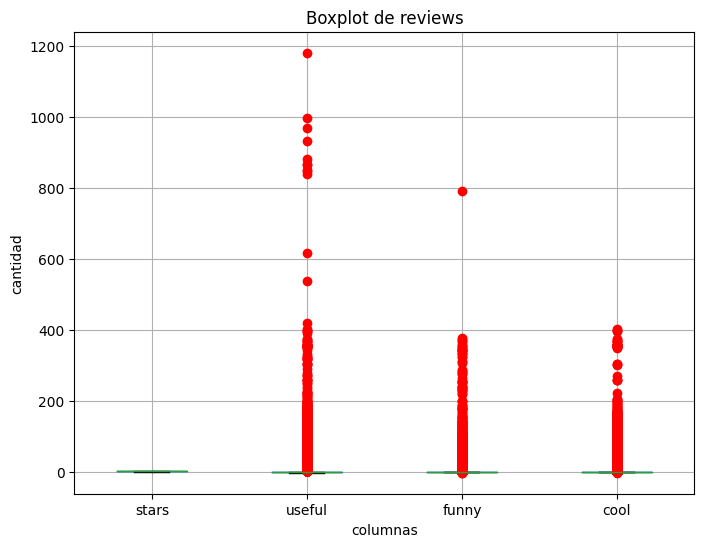

In [4]:
plt.figure(figsize=(8,6))
df_yelp.boxplot(column=['stars','useful','funny','cool'], sym='ro')
plt.title('Boxplot de reviews')
plt.xlabel('columnas')
plt.ylabel('cantidad')

plt.show()

Existen muchas cantidad de outliers en la columna 'useful', 'funny' y 'cool' . La columna Stars esta con parametros correctos. 
La gran cantidad de valores bajos en el boxplot indica que la mayoría de los usuarios participa de manera moderada, publicando pocas reseñas y recibiendo pocos votos en las diferentes categorías.

Nube de palabras

In [5]:
# Tomar las primeras 1000 filas de la columna 'text'
df_review_subset = df_yelp.head(10000)

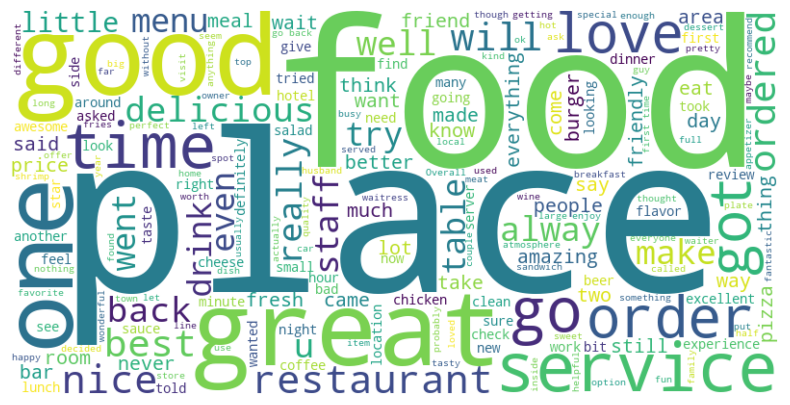

In [6]:
text = " ".join(review for review in df_review_subset.text)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

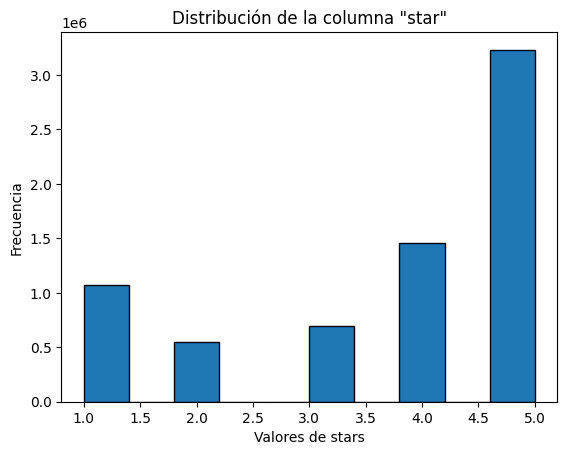

In [143]:
tam_muestra = 1000
muestra = pd.read_json(r"..\src\data-origen\yelp\review.json",
lines=True, chunksize=tam_muestra)

valores = []

for valor in muestra:
    
    valores_uso = valor['stars']
    
    valores.extend(valores_uso)


plt.hist(valores, bins=10, edgecolor='black')
plt.xlabel('Valores de stars')
plt.ylabel('Frecuencia')
plt.title('Distribución de la columna "star"')
plt.show()

Se ve una tendencia de mayor frecuencia de puntuaciones por encima de 3.5 en las reseñas.
La mayoría de las experiencias de los usuarios son positivas. Vemos que los usuarios tienden a calificar favorablemente los negocios que están revisando.



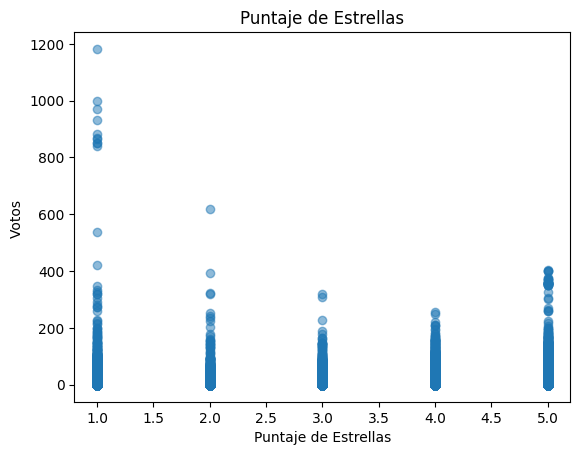

In [9]:
tam_muestra = 10000
#muestra = pd.read_json(r'D:\Denise_Estudio\henry\Proyecto final\data\Yelp\review.json',
muestra = pd.read_json(r'..\src\data-origen\yelp\review.json',                       
lines=True, chunksize=tam_muestra)

useful_list = []
stars_list = []


for data_block in muestra:
    useful_list.extend(data_block['useful'])
    stars_list.extend(data_block['stars'])


plt.scatter(stars_list, useful_list, alpha=0.5)
plt.xlabel('Puntaje de Estrellas')
plt.ylabel('Votos ')
plt.title('Puntaje de Estrellas')
plt.show()

En este gráfico queda en evidencia que con las estrellas con valores mas bajos hay mas interaccion,  siendo este review muy calificado como 'useful' por otros usuarios.


# Datasets TIP


Tips (consejos) escritos por el usuario. Los tips son más cortas que las reseñas y tienden a dar sugerencias rápidas.

In [13]:
data = []

# Leer el archivo JSON Lines
with jsonlines.open(r"..\src\data-origen\yelp\tip.json") as reader:
    for obj in reader:
        data.append(obj)

# Convertir la lista de objetos JSON en un DataFrame
df_tips = pd.DataFrame(data)
df_tips

,user_id,business_id,text,date,compliment_count
0,AGNUgVwnZUey3gcPCJ76iw,3uLgwr0qeCNMjKenHJwPGQ,Avengers time with the ladies.,2012-05-18 02:17:21,0
1,NBN4MgHP9D3cw--SnauTkA,QoezRbYQncpRqyrLH6Iqjg,They have lots of good deserts and tasty cuban...,2013-02-05 18:35:10,0
2,-copOvldyKh1qr-vzkDEvw,MYoRNLb5chwjQe3c_k37Gg,It's open even when you think it isn't,2013-08-18 00:56:08,0
3,FjMQVZjSqY8syIO-53KFKw,hV-bABTK-glh5wj31ps_Jw,Very decent fried chicken,2017-06-27 23:05:38,0
4,ld0AperBXk1h6UbqmM80zw,_uN0OudeJ3Zl_tf6nxg5ww,Appetizers.. platter special for lunch,2012-10-06 19:43:09,0
...,...,...,...,...,...
908910,eYodOTF8pkqKPzHkcxZs-Q,3lHTewuKFt5IImbXJoFeDQ,Disappointed in one of your managers.,2021-09-11 19:18:57,0
908911,1uxtQAuJ2T5Xwa_wp7kUnA,OaGf0Dp56ARhQwIDT90w_g,Great food and service.,2021-10-30 11:54:36,0
908912,v48Spe6WEpqehsF2xQADpg,hYnMeAO77RGyTtIzUSKYzQ,Love their Cubans!!,2021-11-05 13:18:56,0
908913,ckqKGM2hl7I9Chp5IpAhkw,s2eyoTuJrcP7I_XyjdhUHQ,Great pizza great price,2021-11-20 16:11:44,0


Se revisan algunas columas, tipos de datos y nulos

In [14]:
df_tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908915 entries, 0 to 908914
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   user_id           908915 non-null  object
 1   business_id       908915 non-null  object
 2   text              908915 non-null  object
 3   date              908915 non-null  object
 4   compliment_count  908915 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 34.7+ MB


In [15]:
df_tips.isna().sum()

user_id             0
business_id         0
text                0
date                0
compliment_count    0
dtype: int64

In [16]:
df_tips['compliment_count'].value_counts()

compliment_count
0    898376
1      9821
2       617
3        82
4        14
5         3
6         2
Name: count, dtype: int64

Podemos notar que no hay presencia de valos nulos

# Gráficos

Comencemos a analizar con una nube de palabras sobre una muestra de 10000 filas cuales se repiten más

In [17]:
muestra_tip = df_tips.head(10000)

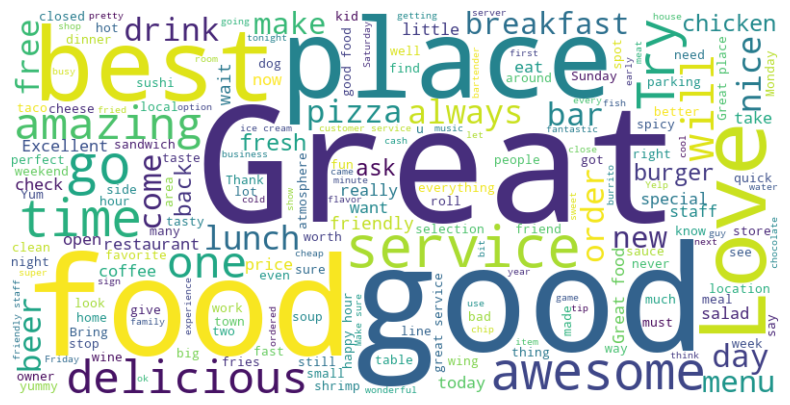

In [18]:
text = " ".join(review for review in muestra_tip.text)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Se puede observar que parece existir una tendencia a dejar comentarios buenos y favorables, dado que resaltan palabras como 'great', 'best' ,'good'.

Intentemos con un filtro, por ejemplo donde aparezca la palabra 'food' para conocer las palabras o frases asociadas que más se repiten.

In [19]:
filtro = df_tips[df_tips['text'].str.contains('food', case=False)]

muestra2_tip = filtro.head(10000)

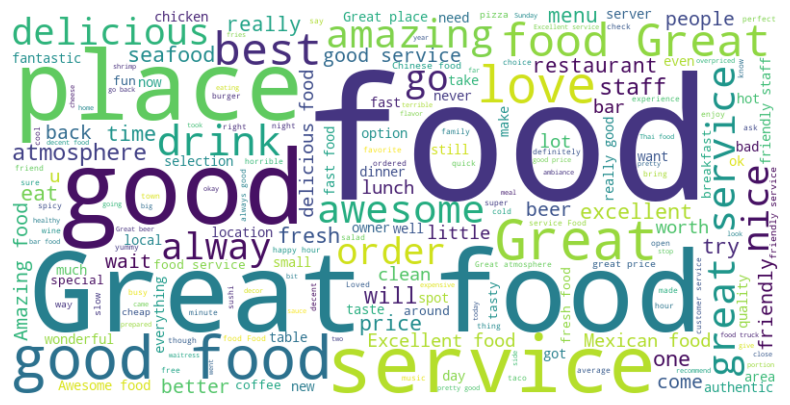

In [20]:
text2 = " ".join(review for review in muestra2_tip.text)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text2)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Análisis de Comentarios en el Ámbito Gastronómico:

Al aplicar un filtro sobre la muestra de datos analizados, se observa una prevalencia de términos y frases favorables relacionados con el ámbito gastronómico. Palabras y expresiones como "great food", "good", y "great service" son recurrentes en los comentarios, indicando una tendencia predominante hacia evaluaciones positivas. Esto sugiere que, en el dataset analizado (TIPS), los comentarios favorables superan en cantidad a las quejas.

# Dataset check in

Creación del dataframe

In [21]:
data = []

# Leer el archivo JSON Lines
with jsonlines.open('../src/data-origen/yelp/checkin.json') as reader:
    for obj in reader:
        data.append(obj)

df_check = pd.DataFrame(data)
df_check

,business_id,date
0,---kPU91CF4Lq2-WlRu9Lw,"2020-03-13 21:10:56, 2020-06-02 22:18:06, 2020..."
1,--0iUa4sNDFiZFrAdIWhZQ,"2010-09-13 21:43:09, 2011-05-04 23:08:15, 2011..."
2,--30_8IhuyMHbSOcNWd6DQ,"2013-06-14 23:29:17, 2014-08-13 23:20:22"
3,--7PUidqRWpRSpXebiyxTg,"2011-02-15 17:12:00, 2011-07-28 02:46:10, 2012..."
4,--7jw19RH9JKXgFohspgQw,"2014-04-21 20:42:11, 2014-04-28 21:04:46, 2014..."
...,...,...
131925,zznJox6-nmXlGYNWgTDwQQ,"2013-03-23 16:22:47, 2013-04-07 02:03:12, 2013..."
131926,zznZqH9CiAznbkV6fXyHWA,2021-06-12 01:16:12
131927,zzu6_r3DxBJuXcjnOYVdTw,"2011-05-24 01:35:13, 2012-01-01 23:44:33, 2012..."
131928,zzw66H6hVjXQEt0Js3Mo4A,"2016-12-03 23:33:26, 2018-12-02 19:08:45"


Revisamos columnas, tipos de datos, nulos 

In [22]:
df_check.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131930 entries, 0 to 131929
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   business_id  131930 non-null  object
 1   date         131930 non-null  object
dtypes: object(2)
memory usage: 2.0+ MB


No hay presencia de nulos

Además podemos ver de este dataset que conotiene la informacion referida a cada negocio asociado por su id, y fechas de registros o cambios que se generen dentro de la plataforma, lo cual nos brinda informacion de los registros de cada negocio y en que fecha se realizo.

# Dataset business

Contiene información del comercio, incluyendo localización, atributos y categorías.

Se crea el dataframe

In [23]:
df_business = pd.read_pickle(r"..\src\data-origen\yelp\business.pkl")

Se busca informacion sobre las columnas, variables y valores nulos

In [24]:
df_business

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,NaN,93101,34.426679,-119.711197,5.0,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,NaN,63123,38.551126,-90.335695,3.0,15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,NaN,85711,32.223236,-110.880452,3.5,22,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,CA,19107,39.955505,-75.155564,4.0,80,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,MO,18054,40.338183,-75.471659,4.5,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150341,IUQopTMmYQG-qRtBk-8QnA,Binh's Nails,3388 Gateway Blvd,Edmonton,IN,T6J 5H2,53.468419,-113.492054,3.0,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150342,c8GjPIOTGVmIemT7j5_SyQ,Wild Birds Unlimited,2813 Bransford Ave,Nashville,DE,37204,36.115118,-86.766925,4.0,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150343,_QAMST-NrQobXduilWEqSw,Claire's Boutique,"6020 E 82nd St, Ste 46",Indianapolis,AB,46250,39.908707,-86.065088,3.5,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150344,mtGm22y5c2UHNXDFAjaPNw,Cyclery & Fitness Center,2472 Troy Rd,Edwardsville,AB,62025,38.782351,-89.950558,4.0,24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
df_business.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150346 entries, 0 to 150345
Data columns (total 28 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   business_id   150346 non-null  object
 1   name          150346 non-null  object
 2   address       150346 non-null  object
 3   city          150346 non-null  object
 4   state         150343 non-null  object
 5   postal_code   150346 non-null  object
 6   latitude      150346 non-null  object
 7   longitude     150346 non-null  object
 8   stars         150346 non-null  object
 9   review_count  150346 non-null  object
 10  is_open       150346 non-null  object
 11  attributes    136602 non-null  object
 12  categories    150243 non-null  object
 13  hours         127123 non-null  object
 14  business_id   5 non-null       object
 15  name          5 non-null       object
 16  address       5 non-null       object
 17  city          5 non-null       object
 18  state         5 non-null     

In [26]:
df_business.isna().sum()

business_id          0
name                 0
address              0
city                 0
state                3
postal_code          0
latitude             0
longitude            0
stars                0
review_count         0
is_open              0
attributes       13744
categories         103
hours            23223
business_id     150341
name            150341
address         150341
city            150341
state           150341
postal_code     150341
latitude        150341
longitude       150341
stars           150341
review_count    150341
is_open         150341
attributes      150341
categories      150341
hours           150341
dtype: int64

Se observa que hay columnas repetidas, las cuales tienen demasiados nulos, dado que hablamos de gran porcentaje opto por borrarlas ya que no podran brindar informacion útil

In [27]:
df_business = df_business.loc[:, ~df_business.columns.duplicated()]
df_business

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,NaN,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,NaN,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,NaN,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,CA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,MO,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150341,IUQopTMmYQG-qRtBk-8QnA,Binh's Nails,3388 Gateway Blvd,Edmonton,IN,T6J 5H2,53.468419,-113.492054,3.0,13,1,"{'ByAppointmentOnly': 'False', 'RestaurantsPri...","Nail Salons, Beauty & Spas","{'Monday': '10:0-19:30', 'Tuesday': '10:0-19:3..."
150342,c8GjPIOTGVmIemT7j5_SyQ,Wild Birds Unlimited,2813 Bransford Ave,Nashville,DE,37204,36.115118,-86.766925,4.0,5,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Pets, Nurseries & Gardening, Pet Stores, Hobby...","{'Monday': '9:30-17:30', 'Tuesday': '9:30-17:3..."
150343,_QAMST-NrQobXduilWEqSw,Claire's Boutique,"6020 E 82nd St, Ste 46",Indianapolis,AB,46250,39.908707,-86.065088,3.5,8,1,"{'RestaurantsPriceRange2': '1', 'BusinessAccep...","Shopping, Jewelry, Piercing, Toy Stores, Beaut...",None
150344,mtGm22y5c2UHNXDFAjaPNw,Cyclery & Fitness Center,2472 Troy Rd,Edwardsville,AB,62025,38.782351,-89.950558,4.0,24,1,"{'BusinessParking': '{'garage': False, 'street...","Fitness/Exercise Equipment, Eyewear & Optician...","{'Monday': '9:0-20:0', 'Tuesday': '9:0-20:0', ..."


In [28]:
df_business.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150346 entries, 0 to 150345
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   business_id   150346 non-null  object
 1   name          150346 non-null  object
 2   address       150346 non-null  object
 3   city          150346 non-null  object
 4   state         150343 non-null  object
 5   postal_code   150346 non-null  object
 6   latitude      150346 non-null  object
 7   longitude     150346 non-null  object
 8   stars         150346 non-null  object
 9   review_count  150346 non-null  object
 10  is_open       150346 non-null  object
 11  attributes    136602 non-null  object
 12  categories    150243 non-null  object
 13  hours         127123 non-null  object
dtypes: object(14)
memory usage: 17.2+ MB


Busco valores duplicados revisando id

In [29]:
duplicates = df_business.duplicated(subset=['business_id'], keep=False)
duplicate_ids = df_business[duplicates]['business_id'].unique()
duplicate_ids

array([], dtype=object)

No se encuentran valores duplicados

In [30]:
df_business.isna().sum()

business_id         0
name                0
address             0
city                0
state               3
postal_code         0
latitude            0
longitude           0
stars               0
review_count        0
is_open             0
attributes      13744
categories        103
hours           23223
dtype: int64

In [31]:
df_business['categories'].value_counts()


categories
Beauty & Spas, Nail Salons                                                                                          1012
Restaurants, Pizza                                                                                                   935
Nail Salons, Beauty & Spas                                                                                           934
Pizza, Restaurants                                                                                                   823
Restaurants, Mexican                                                                                                 728
                                                                                                                    ... 
Restaurants, Specialty Food, Food, Sandwiches, Italian                                                                 1
Professional Services, Accountants, Financial Services, Tax Services                                                   1
Caterers, Convenience

Analicemos por estados, que valores hay y en cuales hay mayores frecuencias

In [32]:
unique_states = df_business['state'].nunique()
unique_states

27

In [33]:
df_business['state'].value_counts()

state
PA     34039
FL     26329
TN     12056
IN     11246
MO     10913
LA      9924
AZ      9912
NJ      8536
NV      7715
AB      5573
CA      5203
ID      4467
DE      2265
IL      2144
TX         4
CO         3
HI         2
MA         2
WA         2
UT         1
NC         1
MI         1
MT         1
SD         1
XMS        1
VI         1
VT         1
Name: count, dtype: int64

Analisis de manera Gráfica

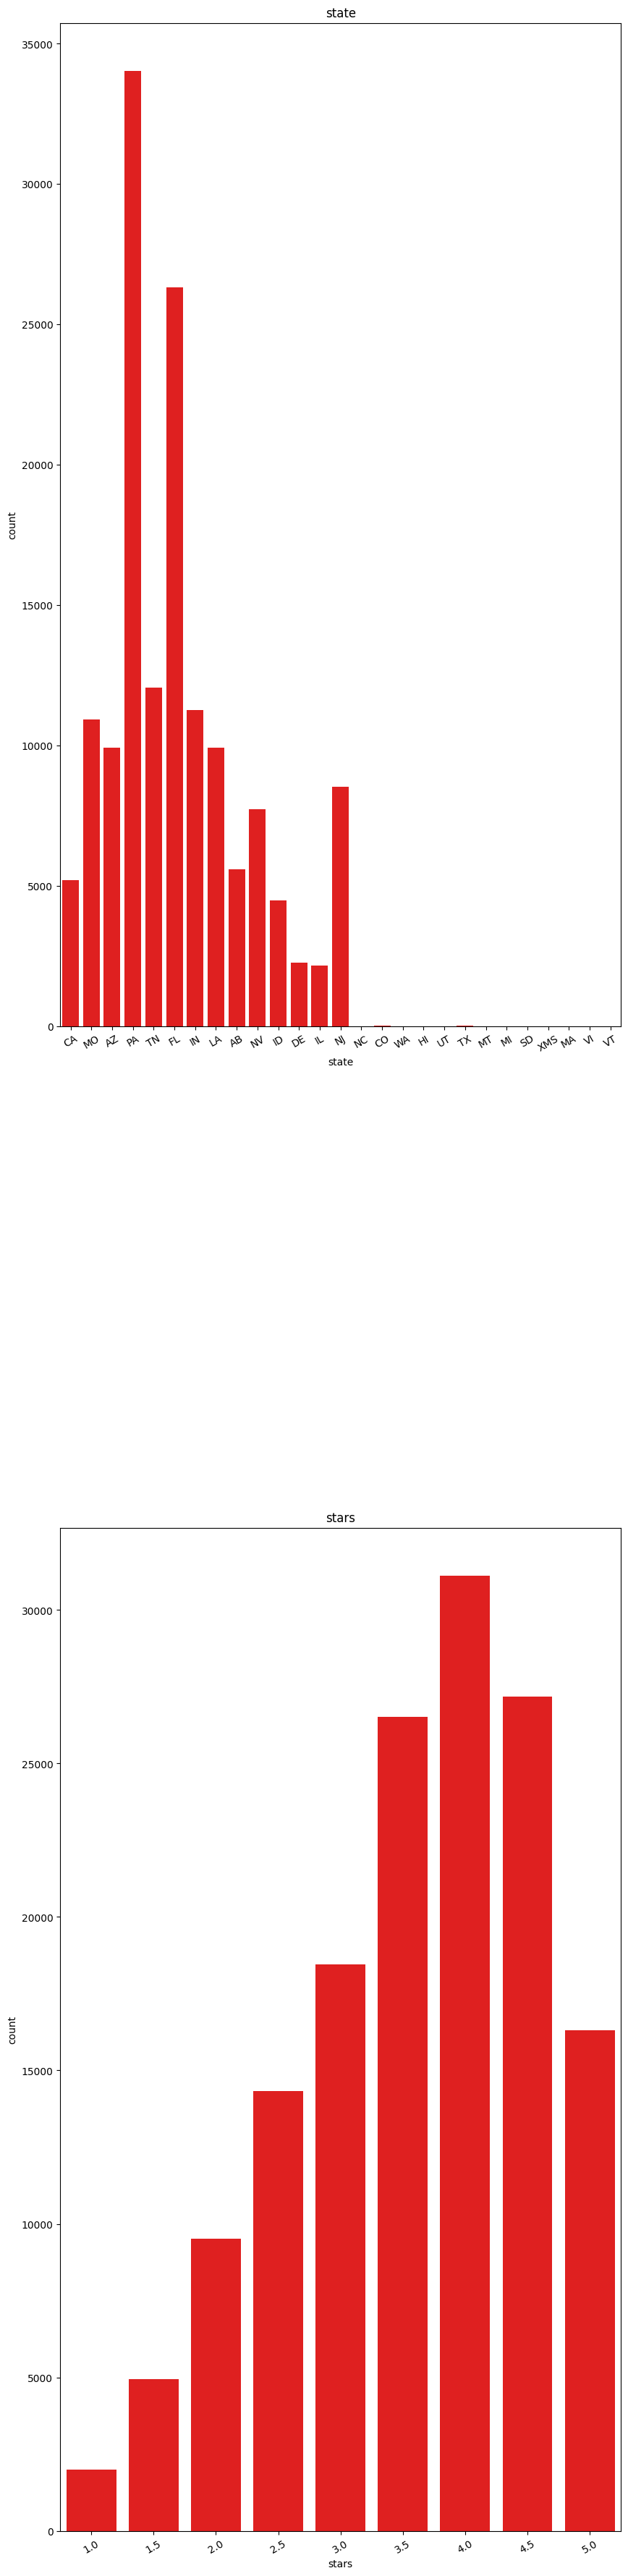

In [35]:
import warnings
warnings.filterwarnings('ignore')

columnas = ["state","stars"]

#Gráficos de barras de conteo
fig, ax = plt.subplots(nrows=len(columnas),ncols =1, figsize=(10,45))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(columnas):
    sns.countplot(x=col, data=df_business,ax=ax[i], color='red')
    ax[i].set_title(col)
    ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)

In [36]:
mayores_negocios = df_business.name.value_counts()

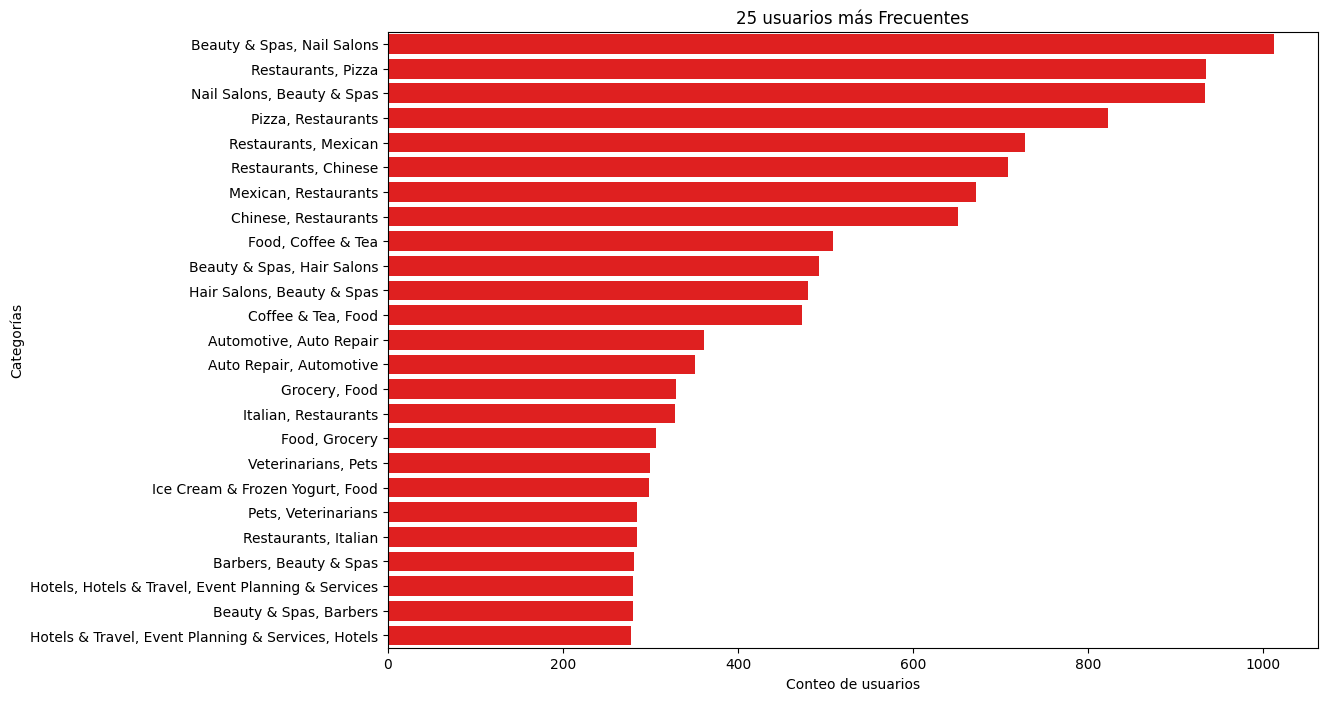

In [37]:
categoria_counts =df_business['categories'].value_counts()

# Seleccionar los 25 nombres más frecuentes
top_25_categorias = categoria_counts.head(25)

# Graficar los 25 caaategorías más frecuentes
plt.figure(figsize=(12, 8))
sns.barplot(x=top_25_categorias.values, y=top_25_categorias.index, color='red')
plt.xlabel('Conteo de usuarios')
plt.ylabel('Categorías')
plt.title('25 usuarios más Frecuentes')
plt.show()

Se pueden analizar las categorias de negocios que más se repiten, siendo los más repetidos salones de belleza, restaurantes (que difieren en categorias entre ellos) y hoteles.

In [38]:
mayores_negocios.head(20)

name
Starbucks                724
McDonald's               703
Dunkin'                  510
Subway                   459
Taco Bell                365
CVS Pharmacy             345
Walgreens                341
Burger King              338
Wendy's                  331
Wawa                     307
Domino's Pizza           295
The UPS Store            281
Pizza Hut                272
Enterprise Rent-A-Car    232
Papa John's Pizza        196
Great Clips              185
Jimmy John's             175
US Post Office           174
KFC                      171
Chick-fil-A              162
Name: count, dtype: int64

Podemos observar que la matoria de cadenas que se repiten son del ámbito gastronómico, vamos a verlo de manera gráfica.

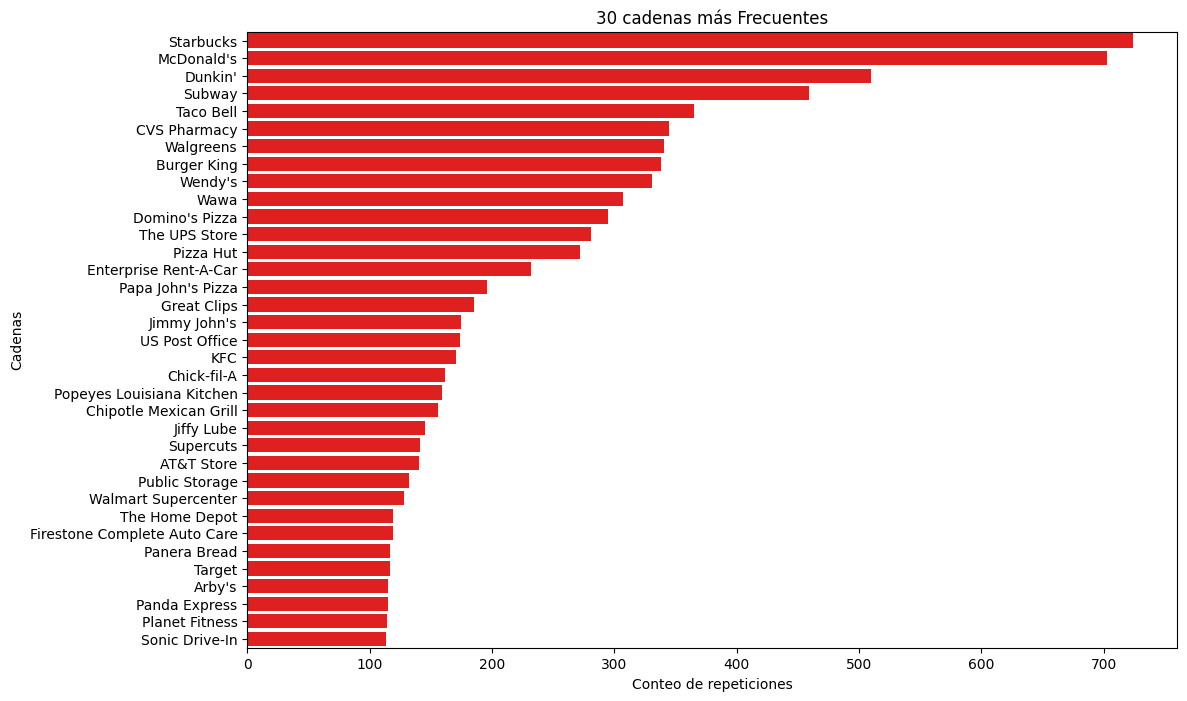

In [39]:
business_count = df_business['name'].value_counts()
top_30_categorias = business_count.head(35)

plt.figure(figsize=(12, 8))
sns.barplot(x=top_30_categorias.values, y=top_30_categorias.index, color='Red')
plt.xlabel('Conteo de repeticiones')
plt.ylabel('Cadenas')
plt.title('30 cadenas más Frecuentes')
plt.show()

Podemos notar que en su mayoria existen muchisimos negocios usuarios de Yelp que sse corresponden al rubro gastronomico, viendo aqui los mejores por filtrado de la columna 'name', que corresponden a las mas grandes cadenas existentes en USA.

Filtremos esto para ver quienes tienen mayor frecuencia en un Estado puntual, California.

In [40]:
df_business_california = df_business.loc[df_business['state'] == 'CA']
df_business_california


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,CA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
29,sqSqqLy0sN8n2IZrAbzidQ,Domino's Pizza,3001 Highway 31 W,White House,CA,37188,36.464747,-86.659187,3.5,8,1,{'RestaurantsPriceRange2': '1'},"Pizza, Chicken Wings, Sandwiches, Restaurants","{'Monday': '10:0-0:0', 'Tuesday': '10:0-0:0', ..."
88,LhpPSrulqVeTyJeK2xydvQ,Fresh Fruits & Salads,114 N 3rd St,Camden,CA,08102,39.94669,-75.123327,4.5,6,1,"{'BusinessParking': '{'garage': False, 'street...","Juice Bars & Smoothies, Restaurants, Fruits & ...","{'Monday': '9:0-18:0', 'Tuesday': '9:0-18:0', ..."
94,ZM46RDLXaFNo_z6t-j_L4w,Absolutely Perfect Inc,1153 Byberry Rd,Bensalem,CA,19020,40.113121,-74.914597,3.5,5,1,"{'BusinessAcceptsBitcoin': 'False', 'BusinessA...","Masonry/Concrete, Gardeners, Lawn Services, Tr...","{'Monday': '7:0-17:0', 'Tuesday': '7:0-17:0', ..."
123,iPSPcprSnkLOuL1Ns8UZZA,Pete's Barber Shop,1209 N 29th St,Philadelphia,CA,19121,39.97488,-75.183262,4.5,12,1,"{'RestaurantsPriceRange2': '1', 'BusinessParki...","Barbers, Beauty & Spas",None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150267,kdwqGOQm_08KEmAqlbEjqg,Iora Primary Care,8616 E Broadway Blvd,Tucson,CA,85710,32.219866,-110.808491,5.0,5,1,"{'AcceptsInsurance': 'True', 'BusinessAcceptsC...","Health & Medical, Doctors, Family Practice, In...","{'Monday': '9:0-17:0', 'Tuesday': '9:0-17:0', ..."
150275,IeSD0nMKRFYUTnR5nZH1CQ,HighWire Lounge,14 S Arizona Ave,Tucson,CA,85701,32.221828,-110.967969,3.5,111,1,"{'BusinessParking': '{'garage': False, 'street...","Bars, Tapas Bars, Restaurants, Nightlife, Gast...","{'Tuesday': '17:0-2:0', 'Wednesday': '17:0-2:0..."
150287,VZbkSeZtFynEascotq7ExA,Ali Baba Magic Food,37TH And Walnut,Philadelphia,CA,19104,39.953391,-75.196765,4.0,8,0,"{'GoodForKids': 'False', 'RestaurantsReservati...","Restaurants, Food Stands",None
150293,0UqeZTDBdV0uY3wesbLvYQ,ampm,1701 Victorian Ave,Sparks,CA,89431,39.534947,-119.765698,4.0,5,1,{'BusinessAcceptsCreditCards': 'True'},"Convenience Stores, Food, Automotive, Gas Stat...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W..."


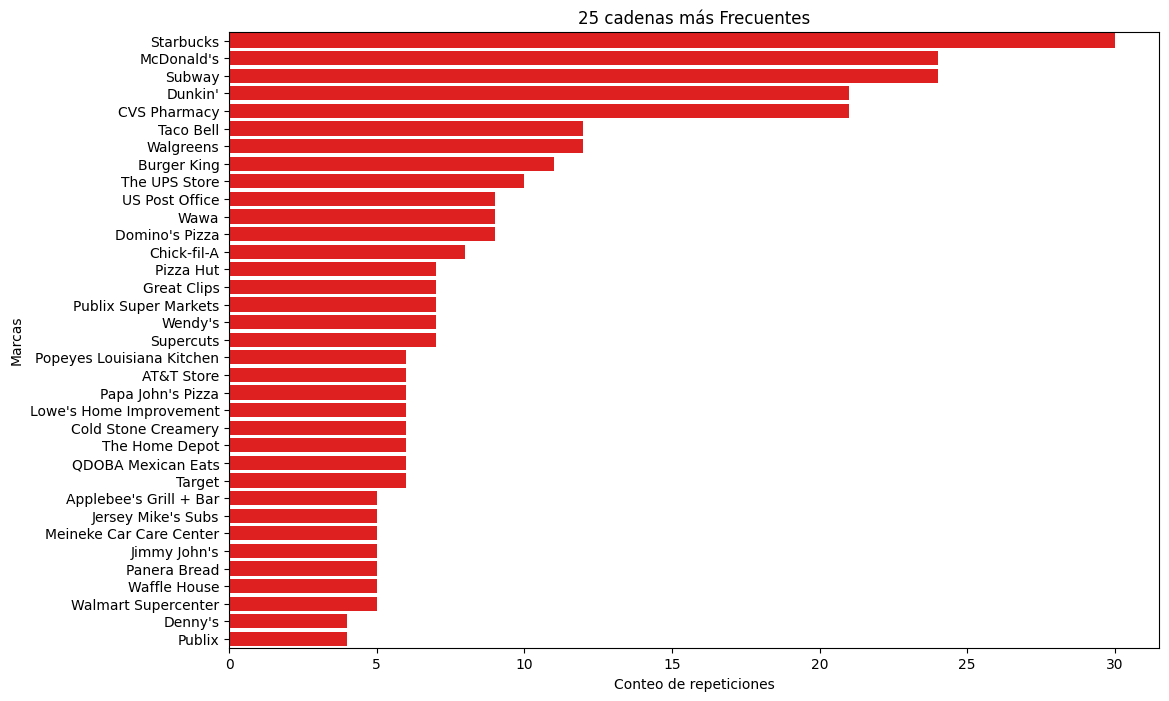

In [41]:
business_count_ca = df_business_california['name'].value_counts()
top_categorias = business_count_ca.head(35)

plt.figure(figsize=(12, 8))
sns.barplot(x=top_categorias.values, y=top_categorias.index, color='Red')
plt.xlabel('Conteo de repeticiones')
plt.ylabel('Marcas')
plt.title('25 cadenas más Frecuentes')
plt.show()

En el Estado de California vemos que existen 30 locales Starsbucks, siendo la cadena con mayor presencia en el estado. Seguido de Mc Donal's y Subway 

Se realiza un merge para saber que establecimientos son:

In [42]:
filtered_df = pd.merge(df_business_california, top_categorias, on='name', how='inner')
filtered_df

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,count
0,sqSqqLy0sN8n2IZrAbzidQ,Domino's Pizza,3001 Highway 31 W,White House,CA,37188,36.464747,-86.659187,3.5,8,1,{'RestaurantsPriceRange2': '1'},"Pizza, Chicken Wings, Sandwiches, Restaurants","{'Monday': '10:0-0:0', 'Tuesday': '10:0-0:0', ...",9
1,3uvFklejzRPwEPEZQ5vHYQ,Wawa,100 E Old Baltimore Pike,Media,CA,19063,39.916176,-75.387655,3.5,14,1,"{'Alcohol': 'u'none'', 'RestaurantsReservation...","Delis, Convenience Stores, Restaurants, Food, ...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...",9
2,feVi5a5xZaahs4WsUfi1tw,CVS Pharmacy,3771 Tampa Rd,Oldsmar,CA,34677,28.0439,-82.6769,3.5,17,1,"{'BikeParking': 'False', 'BusinessAcceptsCredi...","Shopping, Drugstores, Food, Convenience Stores...","{'Monday': '8:0-22:0', 'Tuesday': '10:0-20:0',...",21
3,ruFtZKwlJASx5BTk1dh5AQ,Wendy's,440 N Mccarran Blvd,Sparks,CA,89431,39.538055,-119.734624,2.5,35,1,"{'OutdoorSeating': 'False', 'RestaurantsGoodFo...","Fast Food, Restaurants, Hot Dogs, Burgers","{'Monday': '7:0-0:0', 'Tuesday': '7:0-0:0', 'W...",7
4,kgMEBZG6rjkGeFzPaIM4MQ,McDonald's,914 S Broad St,Philadelphia,CA,19146,39.93944,-75.166805,2.0,55,0,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Fast Food, Food, Restaurants, Coffee & Tea, Bu...","{'Monday': '6:0-0:0', 'Tuesday': '6:0-0:0', 'W...",24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321,t6F5E5a3Eo76wYCOQfiEzA,CVS Pharmacy,4133 G St,Philadelphia,CA,19124,40.011572,-75.11187,2.5,5,1,"{'RestaurantsTakeOut': 'False', 'WheelchairAcc...","Convenience Stores, Shopping, Pharmacy, Health...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...",21
322,n_un56l2_pdJdqQlLZih4A,Walgreens,11010 Bloomingdale Ave,Riverview,CA,33578,27.894055,-82.319391,2.5,5,1,"{'Caters': 'False', 'ByAppointmentOnly': 'Fals...","Drugstores, Convenience Stores, Shopping, Beau...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ...",12
323,rGZBKCaV2AV7Fm4tFtXxdw,Burger King,2901 Clearacre Ln,Reno,CA,89512,39.557004,-119.791938,1.5,42,1,"{'GoodForKids': 'True', 'Alcohol': 'u'none'', ...","Fast Food, Restaurants, Burgers","{'Monday': '6:0-23:0', 'Tuesday': '6:0-23:0', ...",11
324,XzWSh90PT-45Ybo9kgeKfA,Supercuts,"105 S Dale Mabry Hwy Ste D, Kennedy Plaza",Tampa,CA,33609,27.944176,-82.506112,3.5,16,1,"{'RestaurantsPriceRange2': '2', 'ByAppointment...","Hair Salons, Barbers, Cosmetics & Beauty Suppl...","{'Monday': '0:0-0:0', 'Tuesday': '9:0-20:0', '...",7


Filtrar negocios con estrellas entre 3 y 5 estrellas  en todo el dataframe de business para saber luego las que no estan tan presentes y tienen mejoes reseñas

high_rating_df: Contiene solo las filas de filtered_df donde la calificación de estrellas está entre 2 y 5.
business_presence: Calcula cuántas veces aparece cada nombre en high_rating_df. Si se corrige el error y se convierte en un DataFrame, mostrará dos columnas: 'name' y 'frecuencia', donde 'frecuencia' es el número de veces que aparece cada nombre.

Filtrado de resultados entre 3 y 5 stars para tener los nombres de negocios con mejores reseñas

In [43]:
filtered_business = df_business[(df_business['stars'] >= 3) & (df_business['stars'] <= 5)]

In [44]:
name_count = filtered_business['name'].value_counts()
top_names = name_count.head(35)


Graficar los resultados

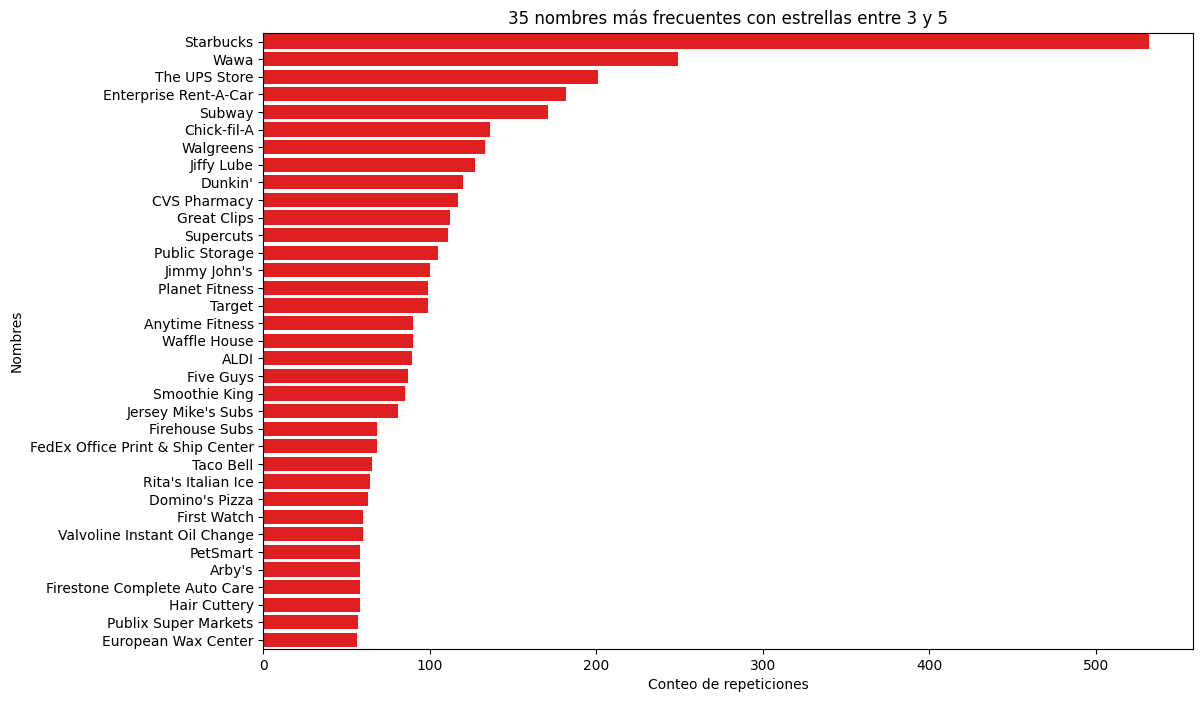

In [45]:
plt.figure(figsize=(12, 8))
sns.barplot(x=top_names.values, y=top_names.index, color='Red')
plt.xlabel('Conteo de repeticiones')
plt.ylabel('Nombres')
plt.title('35 nombres más frecuentes con estrellas entre 3 y 5')
plt.show()



Eje X (horizontal): Representa el conteo de repeticiones, es decir, la cantidad de veces que cada nombre de negocio aparece en las reseñas con calificaciones de entre 3 y 5 estrellas.

Eje Y (vertical): Muestra los nombres de los negocios más frecuentes dentro del rango de estrellas especificado.

Los negocios representados en este gráfico son aquellos que han recibido una cantidad significativa de reseñas con calificaciones de entre 3 y 5 estrellas, lo que puede implicar una satisfacción moderada a alta por parte de los usuarios.
La frecuencia de los nombres sugiere que estos negocios tienen una presencia notable en la base de datos de reseñas, posiblemente debido a su popularidad y amplia distribución.

Conclusión de sección:

Este análisis visual permite identificar rápidamente qué negocios son los más mencionados dentro de las reseñas con calificaciones positivas y moderadas,proporcionando una visión sobre cuáles establecimientos tienen una mayor visibilidad y reciben una cantidad considerable de opiniones por parte de los usuarios.

Relacionando con el gráfico anterior, podemos seleccionar que cadenas presentes en este gráfico son las que tienen mejores reseñas a nivel nacional, para luego identificar en el Estado de California las que tengan oportunidad de crecimiento.


VAMOS A ANALIZARL ALGUNAS

In [46]:
burger_king_indices = df_business[df_business['name'] == 'Burger King'].index

# Usar iloc para seleccionar la columna 'categories' en esos índices
burger_king_categories = df_business.iloc[burger_king_indices][['name', 'categories']]

# Mostrar los resultados
print(burger_king_categories)

               name                                         categories
1329    Burger King                    Restaurants, Burgers, Fast Food
1571    Burger King          Hot Dogs, Burgers, Restaurants, Fast Food
1786    Burger King                    Burgers, Fast Food, Restaurants
2075    Burger King                    Restaurants, Burgers, Fast Food
2538    Burger King                    Fast Food, Restaurants, Burgers
...             ...                                                ...
148443  Burger King                    Fast Food, Restaurants, Burgers
148542  Burger King  Breakfast & Brunch, Restaurants, Burgers, Fast...
149252  Burger King          Burgers, Fast Food, Hot Dogs, Restaurants
149310  Burger King                    Fast Food, Restaurants, Burgers
150028  Burger King                    Burgers, Fast Food, Restaurants

[338 rows x 2 columns]


In [47]:
df_business.iloc[1329]['categories']

'Restaurants, Burgers, Fast Food'

In [48]:
taco_bell_indices = df_business[df_business['name'] == 'Taco Bell'].index

# Usar iloc para seleccionar la columna 'categories' en esos índices
taco_bell_categories = df_business.iloc[taco_bell_indices][['name', 'categories']]

# Mostrar los resultados
print(taco_bell_categories)

             name                                         categories
1067    Taco Bell  Restaurants, Tex-Mex, Breakfast & Brunch, Mexi...
1191    Taco Bell  Restaurants, Fast Food, Mexican, Tex-Mex, Taco...
2150    Taco Bell  Fast Food, Restaurants, Breakfast & Brunch, Ve...
3007    Taco Bell    Restaurants, Fast Food, Tex-Mex, Tacos, Mexican
3321    Taco Bell  Restaurants, Fast Food, Breakfast & Brunch, Me...
...           ...                                                ...
149074  Taco Bell  Restaurants, Tex-Mex, Breakfast & Brunch, Mexi...
149175  Taco Bell  Tex-Mex, Restaurants, Breakfast & Brunch, Fast...
149963  Taco Bell  Fast Food, Breakfast & Brunch, Restaurants, Ta...
150087  Taco Bell  Fast Food, Restaurants, Breakfast & Brunch, Ta...
150166  Taco Bell  Restaurants, Tex-Mex, Fast Food, Mexican, Taco...

[365 rows x 2 columns]


In [49]:
df_business.iloc[1067]['categories']

'Restaurants, Tex-Mex, Breakfast & Brunch, Mexican, Fast Food, Tacos'

# Dataset user

Este dataset contiene datos del usuario incluyendo referencias a otros usuarios amigos y a toda la metadata asociada al usuario.

Cargo el dataset

In [51]:
#df_user = pd.read_parquet(r"E:\Repositorios y bases de datos\Henry DS\_PROYECTO FINAL\material PF\Yelp\user-001.parquet")
df_user = pd.read_parquet(r"..\src\data-origen\yelp\user.parquet")


In [52]:
df_user

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,2007,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",267,...,65,55,56,18,232,844,467,467,239,180
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,...,264,184,157,251,1847,7054,3131,3131,1521,1946
2,2WnXYQFK0hXEoTxPtV2zvg,Steph,665,2008-07-25 10:41:00,2086,1010,1003,"2009,2010,2011,2012,2013","LuO3Bn4f3rlhyHIaNfTlnA, j9B4XdHUhDfTKVecyWQgyA...",52,...,13,10,17,3,66,96,119,119,35,18
3,SZDeASXq7o05mMNLshsdIA,Gwen,224,2005-11-29 04:38:33,512,330,299,"2009,2010,2011","enx1vVPnfdNUdPho6PH_wg, 4wOcvMLtU6a9Lslggq74Vg...",28,...,4,1,6,2,12,16,26,26,10,9
4,hA5lMy-EnncsH4JoR-hFGQ,Karen,79,2007-01-05 19:40:59,29,15,7,,"PBK4q9KEEBHhFvSXCUirIw, 3FWPpM7KU1gXeOM_ZbYMbA...",1,...,1,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2105592,4QGxxakRZeOlg_qDuxmTeQ,Jennilee,38,2012-01-19 23:33:02,74,9,6,,kmwNG5LZSHFmveg6wYYdrw,0,...,1,0,0,0,1,4,0,0,1,0
2105593,tmelBbVBGAzXBVfH2u_R6g,Gerry,19,2009-06-09 16:34:54,14,5,2,,"BFYdCAMFyjYHDwesndEXEg, _9fTIqfSJc7g3V_o76XRVg...",1,...,1,0,0,0,0,1,0,0,0,0
2105594,tpBznnD6uJN3m_pJubj09w,Emily,26,2013-08-13 23:18:11,4,1,2,,"bKV3ly2MuK-K1cptMrFknQ, liel18zRoSB4tEkUP7i6Cg...",0,...,0,0,0,0,1,0,0,0,0,0
2105595,Kst_srPw7GdYydMFYdCtzw,Heatheranne,25,2015-01-10 00:06:25,21,2,5,,"dzHTk52vbGtbktRm_B-wEg, fOfFLV7IbBDN6lzARaLqdg...",0,...,0,0,0,0,0,1,0,0,0,0


In [53]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2105597 entries, 0 to 2105596
Data columns (total 22 columns):
 #   Column              Dtype  
---  ------              -----  
 0   user_id             object 
 1   name                object 
 2   review_count        int64  
 3   yelping_since       object 
 4   useful              int64  
 5   funny               int64  
 6   cool                int64  
 7   elite               object 
 8   friends             object 
 9   fans                int64  
 10  average_stars       float64
 11  compliment_hot      int64  
 12  compliment_more     int64  
 13  compliment_profile  int64  
 14  compliment_cute     int64  
 15  compliment_list     int64  
 16  compliment_note     int64  
 17  compliment_plain    int64  
 18  compliment_cool     int64  
 19  compliment_funny    int64  
 20  compliment_writer   int64  
 21  compliment_photos   int64  
dtypes: float64(1), int64(16), object(5)
memory usage: 353.4+ MB


Reviso los valores nulos

In [55]:
df_user.isna().sum()

user_id               0
name                  0
review_count          0
yelping_since         0
useful                0
funny                 0
cool                  0
elite                 0
friends               0
fans                  0
average_stars         0
compliment_hot        0
compliment_more       0
compliment_profile    0
compliment_cute       0
compliment_list       0
compliment_note       0
compliment_plain      0
compliment_cool       0
compliment_funny      0
compliment_writer     0
compliment_photos     0
dtype: int64

Este dataset posee multiples columnas con informacion referente a los usuaarios de Yelp, y diferentes promedios. No posee nulos o datos faltantes

Reviso si hay valores repetidos.

In [54]:
df_user.duplicated().sum()

np.int64(117700)

Existen 117700 filas repetidas, como esto no va a darme informacion fiable, decido eliminarlos para un mejor analisis

In [56]:
df_user.drop_duplicates(inplace=True)

Reviso los outliers en las columnas numéricas

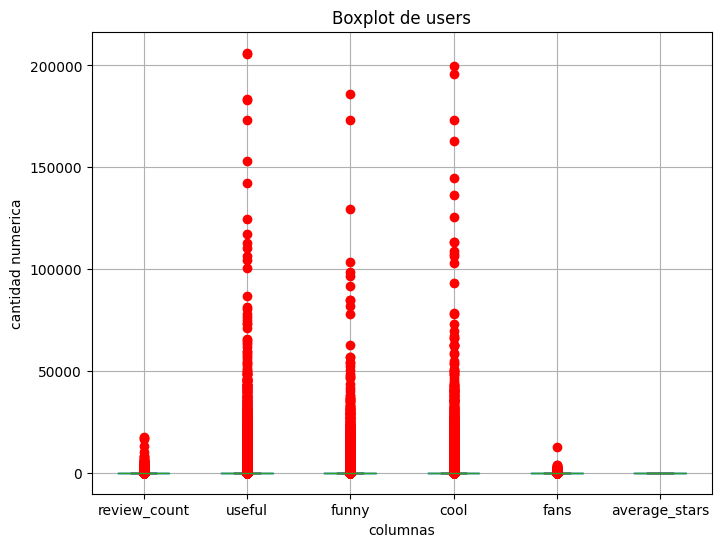

In [57]:
plt.figure(figsize=(8,6))
df_user.boxplot(column=['review_count','useful','funny','cool','fans','average_stars'], sym='ro')
plt.title('Boxplot de users')
plt.xlabel('columnas')
plt.ylabel('cantidad numerica')

plt.show()

Podemos ver que existen muchos valores outliers en cuanto a las columnas'useful','funny','cool' . Algunas pocas con datos de reviews y no hay outliers en average_stars, lo cual se corresponde a lo que cuenta la columna.

El gráfico boxplot presentado muestra la distribución de diferentes métricas de interacción de usuarios en un conjunto de datos. Las métricas evaluadas son:

review_count: La cantidad de reseñas realizadas por los usuarios.
useful: La cantidad de votos que indican que una reseña fue útil.
funny: La cantidad de votos que indican que una reseña fue divertida.
cool: La cantidad de votos que indican que una reseña fue genial.
fans: La cantidad de seguidores que tiene cada usuario.
average_stars: La calificación promedio de las reseñas de cada usuario.

La mayoría de los usuarios tienen valores bajos en todas las métricas evaluadas, lo cual se refleja en la concentración de datos cerca del eje horizontal.
Hay presencia de numerosos valores atípicos (outliers) que se extienden hacia valores muy altos en todas las métricas, especialmente en las categorías de 'useful', 'funny' y 'cool'.

Las métricas 'useful', 'funny' y 'cool' muestran una gran cantidad de valores atípicos que alcanzan hasta los 200,000 votos, indicando que algunos usuarios reciben una cantidad excepcionalmente alta de interacciones en sus reseñas.

La alta concentración de valores bajos en el boxplot sugiere que la mayoría de los usuarios tienen una participación moderada, con pocas reseñas y votos en las distintas categorías.

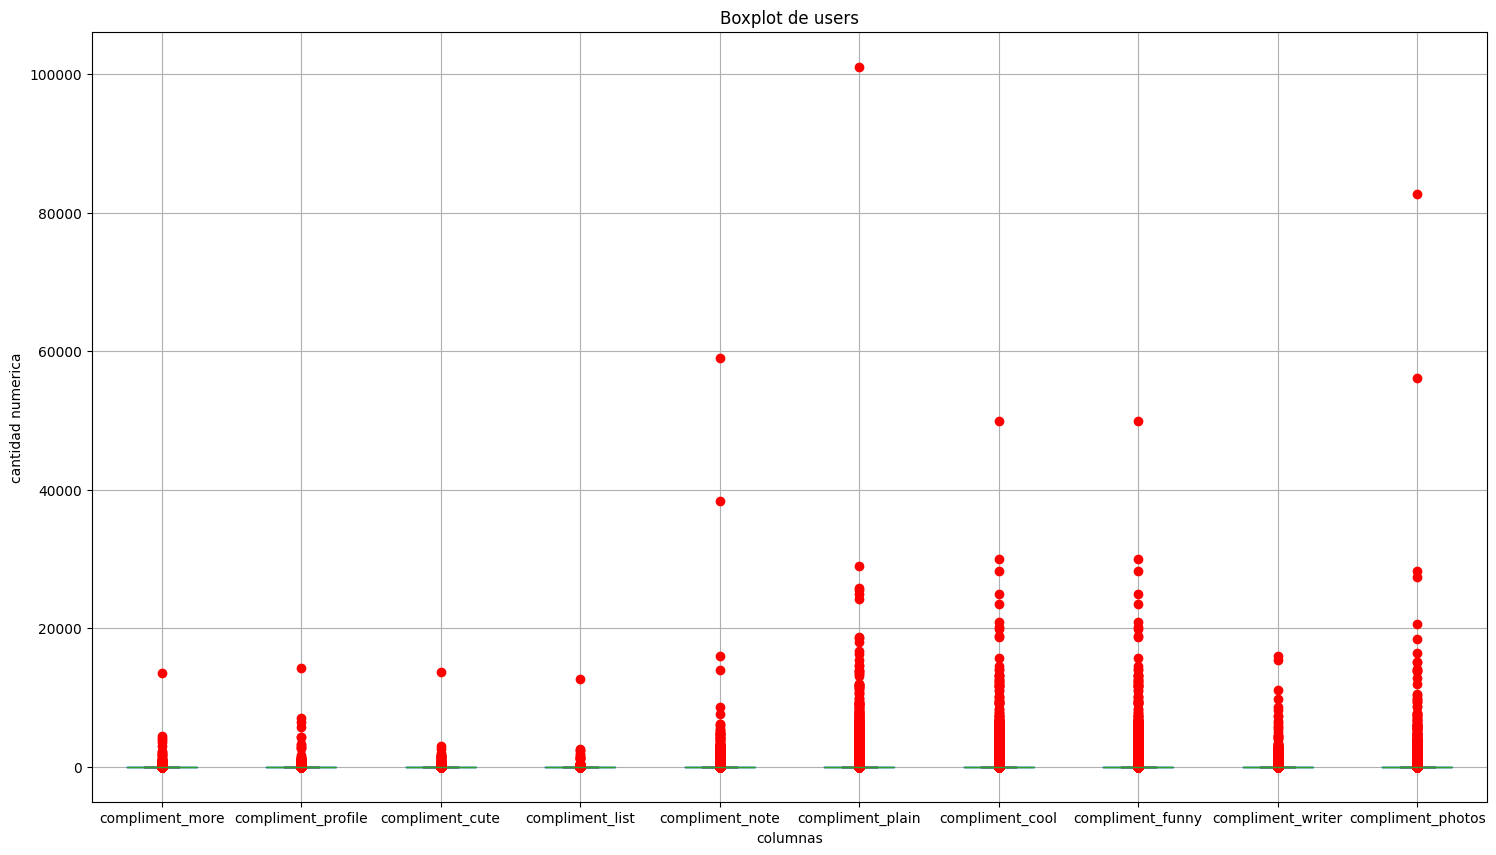

In [58]:
plt.figure(figsize=(18,10))
df_user.boxplot(column=['compliment_more','compliment_profile','compliment_cute','compliment_list','compliment_note','compliment_plain','compliment_cool','compliment_funny','compliment_writer','compliment_photos'], sym='ro')
plt.title('Boxplot de users')
plt.xlabel('columnas')
plt.ylabel('cantidad numerica')

plt.show()

El gráfico boxplot muestra la distribución de diferentes tipos de cumplidos recibidos por los usuarios.
 
Las categorías evaluadas son:

1) compliment_more: Más cumplidos.
2) compliment_profile: Cumplidos sobre el perfil.
3) compliment_cute: Cumplidos por ser lindo/a.
4) compliment_list: Cumplidos por listas.
5) compliment_note: Cumplidos por notas.
6) compliment_plain: Cumplidos sencillos.
7) compliment_cool: Cumplidos por ser genial.
8) compliment_funny: Cumplidos por ser gracioso/a.
9) compliment_writer: Cumplidos por ser buen escritor/a.
10) compliment_photos: Cumplidos por fotos.

Existen varios valores atípicos (outliers) que se extienden hacia valores muy altos, particularmente en las categorías de 'compliment_note', 'compliment_plain', 'compliment_cool', 'compliment_funny', y 'compliment_photos'. Estos valores atípicos resaltan la existencia de usuarios altamente reconocidos o populares, quienes reciben una cantidad significativamente mayor de cumplidos en comparación con el promedio.

Quiero analizar las mejores oportunidades de negocios, por lo que se buscaran franquicias con pocas sucursales y buenas reseñas.

Para esto me dirijo a al dataframe reviews de Yelp.

In [59]:
df_yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6990280 entries, 0 to 6990279
Data columns (total 9 columns):
 #   Column       Dtype  
---  ------       -----  
 0   review_id    object 
 1   user_id      object 
 2   business_id  object 
 3   stars        float64
 4   useful       int64  
 5   funny        int64  
 6   cool         int64  
 7   text         object 
 8   date         object 
dtypes: float64(1), int64(3), object(5)
memory usage: 480.0+ MB


In [60]:
average_stars = df_yelp.groupby('business_id')['stars'].sum()

top_business = average_stars.sort_values(ascending=False).head(30)

top_business

business_id
_ab50qdWOk0DdB6XOrBitw    31651.0
ac1AeYqs8Z4_e2X5M3if2A    31163.0
GXFMD0Z4jEVZBCsbPf4CTQ    27389.0
ytynqOUb3hjKeJfRj5Tshw    26610.0
oBNrLz4EDhiscSlbOl8uAw    22589.0
_C7QiQQc47AOEv4PE3Kong    21327.0
VQcCL9PiNL_wkGf-uF3fjg    19486.0
GBTPC53ZrG1ZBY3DT8Mbcw    19471.0
6a4gLLFSgr-Q6CZXDLzBGQ    18755.0
I_3LMZ_1m2mzR0oLIOePIg    18276.0
iSRTaT9WngzB8JJ2YKJUig    18067.0
1b5mnK8bMnnju_cvU65GqQ    17715.0
gTC8IQ_i8zXytWSly3Ttvg    17663.0
yPSejq3_erxo9zdVYTBnZA    17459.0
VaO-VW3e1kARkU9bP1E7Fw    15982.0
qb28j-FNX1_6xm7u372TZA    15548.0
VVH6k9-ycttH3TV_lk5WfQ    15457.0
ctHjyadbDQAtUFfkcAFEHw    14433.0
QHWYlmVbLC3K6eglWoHVvA    13941.0
PP3BBaVxZLcJU54uP_wL6Q    13910.0
L5LLN0RafiV1Z9cddzvuCw    13194.0
9PZxjhTIU7OgPIzuGi89Ew    12943.0
dsfRniRgfbDjC8os848B6A    12875.0
6ajnOk0GcY9xbb5Ocaw8Gw    12690.0
C9K3579SJgLPp0oAOM29wg    12639.0
VAeEXLbEcI9Emt9KGYq9aA    12557.0
U3grYFIeu6RgAAQgdriHww    12201.0
j-qtdD55OLfSqfsWuQTDJg    11959.0
ww3YJXu5c18aGZXWmm00qg    11848.0
xl

In [61]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1987897 entries, 0 to 1987896
Data columns (total 22 columns):
 #   Column              Dtype  
---  ------              -----  
 0   user_id             object 
 1   name                object 
 2   review_count        int64  
 3   yelping_since       object 
 4   useful              int64  
 5   funny               int64  
 6   cool                int64  
 7   elite               object 
 8   friends             object 
 9   fans                int64  
 10  average_stars       float64
 11  compliment_hot      int64  
 12  compliment_more     int64  
 13  compliment_profile  int64  
 14  compliment_cute     int64  
 15  compliment_list     int64  
 16  compliment_note     int64  
 17  compliment_plain    int64  
 18  compliment_cool     int64  
 19  compliment_funny    int64  
 20  compliment_writer   int64  
 21  compliment_photos   int64  
dtypes: float64(1), int64(16), object(5)
memory usage: 348.8+ MB


# METADATA

# Nulos

In [111]:
df_metadata.isnull().sum()

name                     8
address               9800
gmap_id                  0
description         260890
latitude                 0
longitude                0
category              2119
avg_rating               0
num_of_reviews           0
price               260600
hours                82877
MISC                 77174
state                79059
relative_results     33835
url                      0
dtype: int64

In [112]:
print(df_metadata[df_metadata.isnull().any(axis=1)])

                                                 name  \
0                                     Porter Pharmacy   
1                                              Glik's   
2       Oscoda County Area Transit Authority (O-cats)   
3                         Hickerson Floor & Tile Haus   
4                                   Beck Suzanne A MD   
...                                               ...   
274996                          Quality Office Supply   
274997                                      JV towing   
274998        Sisom Osia, MD (Gateway Medical Center)   
274999                                    Rasa Floors   
275000                            Alpha Testing, Inc.   

                                                  address  \
0       Porter Pharmacy, 129 N Second St, Cochran, GA ...   
1               Glik's, 1405 W Main St, Gaylord, MI 49735   
2       Oscoda County Area Transit Authority (O-cats),...   
3       Hickerson Floor & Tile Haus, 2234 M-32, Gaylor...   
4       Be

# Vacíos

In [62]:
warnings.filterwarnings('ignore')

In [63]:
def is_empty(x):
    if x is None:
        return True
    elif isinstance(x, (str, list, dict, set, np.ndarray)) and len(x) == 0:
        return True
    return False

# Aplicar la función al DataFrame
empty_mask = df_metadata.applymap(is_empty)

# Ver el número de valores vacíos en cada columna
print("\nValores vacíos por columna:")
print(empty_mask.sum())

# Ver las filas que contienen valores vacíos
print("\nFilas con valores vacíos:")
print(df_metadata[empty_mask.any(axis=1)])


Valores vacíos por columna:
name                     8
address               9800
gmap_id                  0
description         260890
latitude                 0
longitude                0
category              2119
avg_rating               0
num_of_reviews           0
price               260600
hours                82877
MISC                 77174
state                79059
relative_results     33835
url                      0
dtype: int64

Filas con valores vacíos:
                                                 name  \
0                                     Porter Pharmacy   
1                                              Glik's   
2       Oscoda County Area Transit Authority (O-cats)   
3                         Hickerson Floor & Tile Haus   
4                                   Beck Suzanne A MD   
...                                               ...   
274996                          Quality Office Supply   
274997                                      JV towing   
274998       

# Tipos de datos

In [64]:
#Evaluamos con qué tipo de datos contamos. Nos interesa buscar especialmente cadenas de texto y números enteros
print(df_metadata.dtypes)

name                 object
address              object
gmap_id              object
description          object
latitude            float64
longitude           float64
category             object
avg_rating          float64
num_of_reviews        int64
price                object
hours                object
MISC                 object
state                object
relative_results     object
url                  object
dtype: object


# Metadatos

In [65]:
# Las siguientes celdad muestran datos generales del data frame
df_metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275001 entries, 0 to 275000
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   name              274993 non-null  object 
 1   address           265201 non-null  object 
 2   gmap_id           275001 non-null  object 
 3   description       14111 non-null   object 
 4   latitude          275001 non-null  float64
 5   longitude         275001 non-null  float64
 6   category          272882 non-null  object 
 7   avg_rating        275001 non-null  float64
 8   num_of_reviews    275001 non-null  int64  
 9   price             14401 non-null   object 
 10  hours             192124 non-null  object 
 11  MISC              197827 non-null  object 
 12  state             195942 non-null  object 
 13  relative_results  241166 non-null  object 
 14  url               275001 non-null  object 
dtypes: float64(3), int64(1), object(11)
memory usage: 31.5+ MB


In [66]:
# Imprimir las dimensiones del data frame
print(df_metadata.shape)

(275001, 15)


In [67]:
#Visualización de los nombres de las columnas
print(df_metadata.columns)

Index(['name', 'address', 'gmap_id', 'description', 'latitude', 'longitude',
       'category', 'avg_rating', 'num_of_reviews', 'price', 'hours', 'MISC',
       'state', 'relative_results', 'url'],
      dtype='object')


In [68]:
# Datos estadísticos
print(df_metadata.describe())      #Se procederá en el ETL a transformar la notación

            latitude      longitude     avg_rating  num_of_reviews
count  275001.000000  275001.000000  275001.000000   275001.000000
mean       37.412697     -92.352597       4.307292       21.480809
std         5.397783      16.295669       0.775939       39.842302
min         0.000000    -178.791667       1.000000        1.000000
25%        33.698013     -99.675904       4.000000        4.000000
50%        38.209671     -87.615405       4.500000        8.000000
75%        41.258890     -80.308926       4.900000       24.000000
max        74.661691     164.206899       5.000000     2258.000000


In [69]:
unique_misc = df_metadata['gmap_id'].unique()
#no se le puede aplicar a 'MISC', 'category', 'hours', 'relative_results' por ser de tipo lista.

Ejemplo de cómo se estructuran los valores en la columna 'category'

In [70]:
# Se elije esta columna por ser fundamental para el análisis y por ser muy compleja.
df_metadata.loc[7, 'category']

['Fashion accessories store', 'Baby clothing store', "Women's clothing store"]

In [71]:
# Vista rápida de la frecuencia de cada valor único en la columna 'category'
category_counts = df_metadata['category'].value_counts()
print(category_counts)


category
[Church]                                                                                                                                                                                                         3933
[Auto repair shop]                                                                                                                                                                                               3116
[Restaurant]                                                                                                                                                                                                     3097
[Beauty salon]                                                                                                                                                                                                   2871
[Park]                                                                                                                                 

# Duplicados

In [72]:
#Crear una lista para almacenar las columnas que causaron problemas
columnas_problema = []

def check_duplicates(dataframe):
    global columnas_problema
    
    # Crear una lista para almacenar las columnas que se pueden procesar
    columnas_procesables = []

    for col in dataframe.columns:
        try:
            # Intentar acceder a los datos de la columna
            df_metadata[columnas_procesables].append(col)
        except Exception as e:
            columnas_problema.append(col)
            

    # Crear un DataFrame solo con las columnas procesables
    df_procesable = dataframe[columnas_procesables]
    
    # Verificar duplicados en el DataFrame procesable
    try:
        duplicados = df_procesable.duplicated()
        num_duplicados = duplicados.sum()
        if num_duplicados > 0:
            print(f"Número de filas duplicadas en el DataFrame: {num_duplicados}")
            print("Filas duplicadas:")
            print(dataframe[duplicados])
        else:
            print("No hay filas duplicadas en el DataFrame.")
    except Exception as e:
        print(f"Error al verificar duplicados en el DataFrame procesable: {e}")

# Verificar duplicados en el DataFrame
check_duplicates(df_metadata)

# Listar las columnas problemáticas
if columnas_problema:
    print("Columnas que no pueden ser accedidas:")
    for col in columnas_problema:
        print(col)
        

No hay filas duplicadas en el DataFrame.
Columnas que no pueden ser accedidas:
name
address
gmap_id
description
latitude
longitude
category
avg_rating
num_of_reviews
price
hours
MISC
state
relative_results
url


# Outliers

In [73]:
def calculate_outliers_iqr(column):
    # Eliminar valores nulos antes de calcular
    column = column.dropna()

    # Calcular Q1 (primer cuartil) y Q3 (tercer cuartil)
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1

    # Definir los límites para identificar outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identificar los outliers
    outliers = column[(column < lower_bound) | (column > upper_bound)]

    return outliers

# Aplicar la función a `avg_rating`
avg_rating_outliers = calculate_outliers_iqr(df_metadata['avg_rating'])
print("Outliers en avg_rating:")
print(avg_rating_outliers)

Outliers en avg_rating:
19        1.4
24        2.3
25        2.0
37        2.1
66        2.0
         ... 
274971    2.2
274974    2.5
274976    1.0
274982    2.3
274995    1.0
Name: avg_rating, Length: 11839, dtype: float64


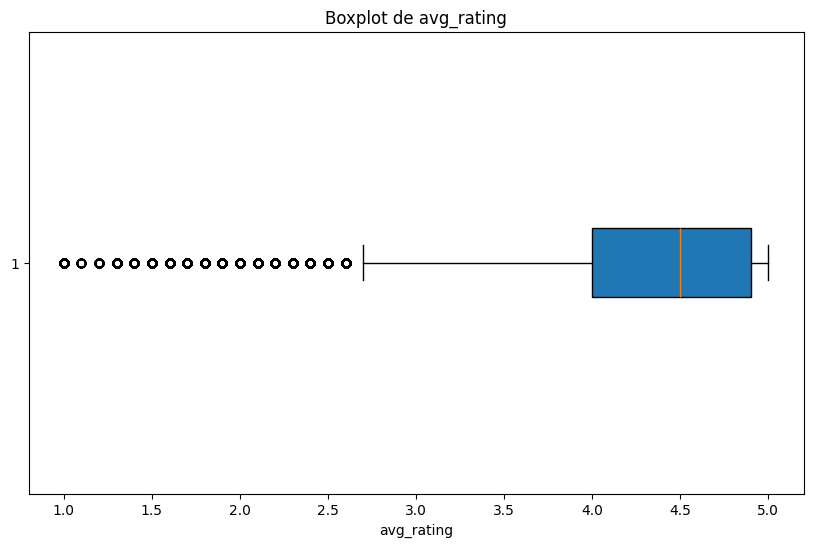

In [74]:
# Crear el boxplot para visualizar los outliers
plt.figure(figsize=(10, 6))  # Crear una nueva figura con tamaño específico
plt.boxplot(df_metadata['avg_rating'].dropna(), vert=False, patch_artist=True)  # Crear el boxplot
plt.title('Boxplot de avg_rating')  # Título del gráfico
plt.xlabel('avg_rating')  # Etiqueta del eje X
plt.show()  # Mostrar el gráfico

La mayoría de los ítems (probablemente productos o servicios) reciben calificaciones promedio bastante positivas, con la mayor parte entre 3.8 y 4.5.
Hay una cantidad significativa de outliers con calificaciones bajas, lo que podría indicar algunos ítems problemáticos o experiencias negativas consistentes para ciertos productos/servicios.
La asimetría sugiere que es más común ver calificaciones muy bajas que calificaciones perfectas de 5.0.
La concentración de calificaciones en el rango alto podría indicar una tendencia general de satisfacción del usuario o posiblemente un sesgo positivo en el sistema de calificación.

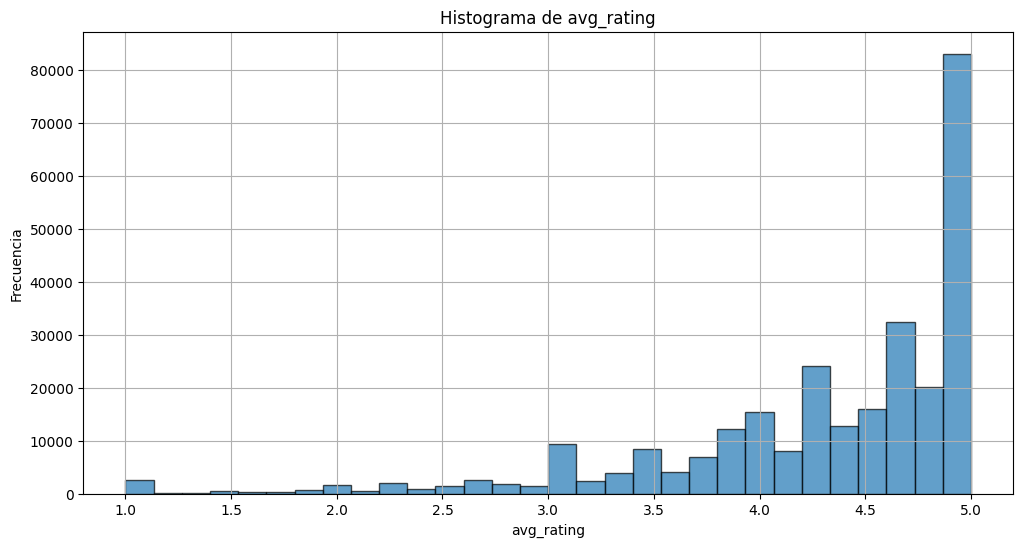

In [75]:
# Crear histograma para `avg_rating`
plt.figure(figsize=(12, 6))
plt.hist(df_metadata['avg_rating'].dropna(), bins=30, edgecolor='black', alpha=0.7)
plt.title('Histograma de avg_rating')
plt.xlabel('avg_rating')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

La alta concentración de calificaciones de 5 estrellas podría indicar una tendencia de los usuarios a dar calificaciones perfectas con frecuencia, posiblemente inflando las calificaciones generales.
El sesgo hacia calificaciones altas podría deberse a varios factores:

Satisfacción general alta con los productos/servicios.
Tendencia de los usuarios satisfechos a dejar más reseñas que los insatisfechos.
Posible sesgo de selección donde los usuarios compran productos que esperan les gusten.
Posible presencia de reseñas falsas o incentivadas que tienden a ser muy positivas.


La relativamente baja frecuencia de calificaciones medias (2.5-3.5) sugiere que los usuarios tienden a tener opiniones más polarizadas.
El pequeño pico en 1.0 podría representar usuarios muy insatisfechos o productos problemáticos.
La granularidad observada en valores enteros y medios sugiere que muchos usuarios simplifican sus calificaciones, lo que podría afectar la precisión de las calificaciones promedio.

In [76]:
# Aplicar la función a `num_of_reviews`
num_of_reviews_outliers = calculate_outliers_iqr(df_metadata['num_of_reviews'])
print("Outliers en num_of_reviews:")
print(num_of_reviews_outliers)


Outliers en num_of_reviews:
6          88
7          68
20         58
31         58
41         58
         ... 
274917     58
274926    108
274960     56
274965     98
274998    188
Name: num_of_reviews, Length: 23919, dtype: int64


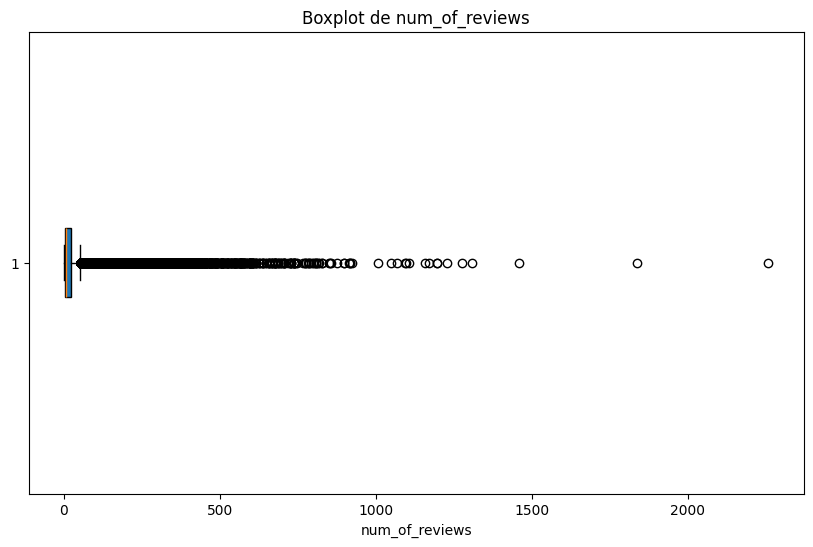

In [77]:
# Crear el boxplot para visualizar los outliers
plt.figure(figsize=(10, 6))  # Crear una nueva figura con tamaño específico
plt.boxplot(df_metadata['num_of_reviews'].dropna(), vert=False, patch_artist=True)  # Crear el boxplot
plt.title('Boxplot de num_of_reviews')  # Título del gráfico
plt.xlabel('num_of_reviews')  # Etiqueta del eje X
plt.show()  # Mostrar el gráfico

La gran mayoría de los elementos (probablemente productos o servicios) tienen muy pocas reseñas. Esto podría indicar que muchos productos son nuevos, poco populares, o que los usuarios no tienden a dejar reseñas con frecuencia.
Hay un pequeño número de elementos "superestrellas" que han acumulado un número excepcionalmente alto de reseñas. Estos podrían ser productos muy populares, best-sellers, o elementos que han estado en el mercado por mucho tiempo.
La distribución sugiere una "economía de los superestrellas" donde unos pocos productos acaparan la mayoría de la atención y las reseñas, mientras que la gran mayoría recibe poca atención.
Esta distribución podría afectar la confiabilidad de las calificaciones promedio, ya que muchos productos tienen muy pocas reseñas para ser estadísticamente significativas.
Para análisis futuros, podría ser útil considerar separadamente los productos con un número significativo de reseñas de aquellos con muy pocas.
Desde una perspectiva de negocio, esto podría indicar oportunidades para fomentar más reseñas en la mayoría de los productos, o para entender qué hace que ciertos productos obtengan tantas reseñas.

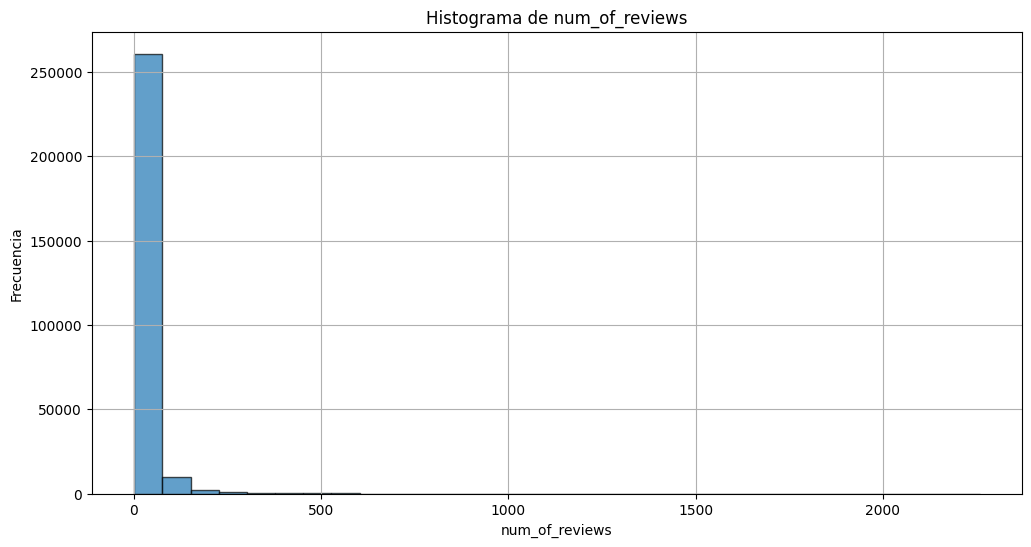

In [78]:
# Crear histograma para `num_of_reviews`
plt.figure(figsize=(12, 6))
plt.hist(df_metadata['num_of_reviews'].dropna(), bins=30, edgecolor='black', alpha=0.7)
plt.title('Histograma de num_of_reviews')
plt.xlabel('num_of_reviews')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

La gran mayoría de los elementos (productos/servicios) tienen muy pocas reseñas, posiblemente incluso cero. Esto podría indicar:
a) Muchos productos nuevos o poco conocidos en el catálogo.
b) Baja participación de los usuarios en dejar reseñas para la mayoría de los productos.
c) Un catálogo muy extenso con muchos productos de nicho.
Solo una pequeña fracción de los elementos recibe un número significativo de reseñas. Estos podrían ser:
a) Productos muy populares o best-sellers.
b) Productos que han estado en el mercado por mucho tiempo.
c) Productos que por alguna razón generan más engagement de los usuarios.
Esta distribución plantea desafíos para la interpretación de las calificaciones promedio:
a) Para la mayoría de los productos, las calificaciones promedio podrían no ser estadísticamente significativas debido al bajo número de reseñas.
b) Los productos con muchas reseñas podrían dominar las métricas generales del sistema.

Sugerencias para el cliente: 
Necesidad de estrategias para incentivar más reseñas en la mayoría de los productos.
Posible revisión de la visibilidad o relevancia de productos con pocas o ninguna reseña.
Considerar ponderaciones o ajustes en los sistemas de recomendación para no favorecer excesivamente a los productos con muchas reseñas.
Investigar qué factores contribuyen a que ciertos productos obtengan muchas más reseñas que otros.

## Conclusión

Hay columnas con una cantidad significativa de valores vacíos (como description, price, hours, MISC, state, relative_results). Se espera manipular estos datos en el proceso de ETL.
Las columnas latitude, longitude, avg_rating, y num_of_reviews parecen estar completas y en su mayoría bien formateadas, lo que es positivo para el análisis.

La mayoría de los negocios tienen calificaciones promedio bastante altas, con la mayoría de las calificaciones entre 3.8 y 4.5. Sin embargo, hay una notable cantidad de outliers con calificaciones bajas y un pequeño pico en 1.0, lo que podría indicar algunos problemas con ciertos negocios o experiencias negativas consistentes.

La distribución de reseñas muestra que la mayoría de los negocios tienen pocas reseñas, lo que sugiere que muchos negocios son nuevos o menos conocidos. Sin embargo, hay un pequeño número de negocios con un número excepcionalmente alto de reseñas.

La alta concentración de calificaciones de 5 estrellas podría ser un indicativo de un sesgo positivo en el sistema de calificaciones. Esto podría ser resultado de una satisfacción general alta, una tendencia de usuarios satisfechos a dejar más reseñas, o incluso reseñas incentivadas.

La baja frecuencia de calificaciones medias sugiere que los usuarios tienden a ser más polarizados en sus opiniones, dando calificaciones muy altas o muy bajas.

La distribución de reseñas sugiere que unos pocos negocios reciben la mayoría de la atención y reseñas, mientras que la mayoría recibe muy poca. Esto puede indicar oportunidades para aumentar la visibilidad de productos menos reseñados o entender por qué ciertos negocios reciben tantas reseñas.

De aquí se deduce que se puede mejorar en:
Desarrollar estrategias para aumentar el número de reseñas en la mayoría de los productos, especialmente en aquellos con pocas o ninguna reseña.
Considerar la visibilidad o relevancia de productos con pocas reseñas para mejorar su presencia.
Ajustar los sistemas de recomendación para no favorecer excesivamente a los negocios con muchas reseñas. Esto podría implicar ponderar las reseñas de manera que reflejen mejor la calidad general del negocio.
Investigar los factores que contribuyen a que ciertos negocios reciban muchas más reseñas que otros, lo cual puede proporcionar insights para mejorar las estrategias de marketing y engagement.



# DATOS_MACROECONOMICOS

In [79]:
df_macro.head(10)

,ESTADO,Fecha,PIB anual M$,Var. PIB (%),PIB Per Capita,Var. anual PIB Per Capita,Densidad,Poblacion,PIB Per Capita $
0,California,2023,3862171,"2,10%",99.119Â $,"6,30%",92,38965193,99118
1,California,2022,3641643,"0,70%",93.278Â $,"6,90%",92,39040616,93278
2,California,2021,3416939,"7,60%",87.289Â $,"12,40%",92,39145060,87289
3,California,2020,3068809,"-1,30%",77.685Â $,"0,30%",93,39503200,77685
4,California,2019,3062159,"3,90%",77.429Â $,"5,60%",93,39547996,77429
5,Alabama,2023,300152,"2,50%",58.756Â $,"5,90%",38,5108468,58756
6,Alabama,2022,281569,"1,70%",55.494Â $,"8,60%",37,5073903,55494
7,Alabama,2021,257987,"4,40%",51.083Â $,"9,30%",37,5050380,51083
8,Alabama,2020,235118,"-1,30%",46.726Â $,"-0,30%",37,5031864,46726
9,Alabama,2019,234526,"1,90%",46.873Â $,"3,10%",37,5003418,46873


In [80]:
df_macro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   ESTADO                     250 non-null    object
 1   Fecha                      250 non-null    int64 
 2   PIB anual M$               250 non-null    int64 
 3   Var. PIB (%)               250 non-null    object
 4   PIB Per Capita             250 non-null    object
 5   Var. anual PIB Per Capita  250 non-null    object
 6   Densidad                   250 non-null    int64 
 7   Poblacion                  250 non-null    int64 
 8   PIB Per Capita $           250 non-null    int64 
dtypes: int64(5), object(4)
memory usage: 17.7+ KB


In [81]:
df_2023 = df_macro[df_macro['Fecha'] == 2023]

Introducción a la sección:

Al considerar la viabilidad de abrir un negocio o expandirse en un nuevo mercado, es crucial evaluar una serie de variables económicas y demográficas que proporcionan una visión integral del entorno empresarial. Entre las variables que consideramos mas importantes para analizar encontramos la población, la densidad poblacional, el PIB y el PIB per cápita, las cuales son fundamentales para entender el potencial de un mercado y las oportunidades de crecimiento del mismo.

Al evaluar la población podemos llegar a entender el tamaño del mercado, la densidad poblacional nos permitira identificar cómo están distribuidos los consumidores, y el PIB y el PIB per cápita brindaran información sobre la capacidad económica y el poder adquisitivo de los residentes de un determinado lugar. 

Tomar en cuenta estas variables nos permitira tomar una decision informada sobre en cual de lo estados de EE.UU. tenemos que dirigir nuestra lupa para analizar la información obtenida de Yelp y de Google maps con el objetivo de diseñar una estrategias de marketing efectiva, un sistema de recomendaciones y adaptar una oferta a las necesidades y expectativas del mercado objetivo que escojamos.


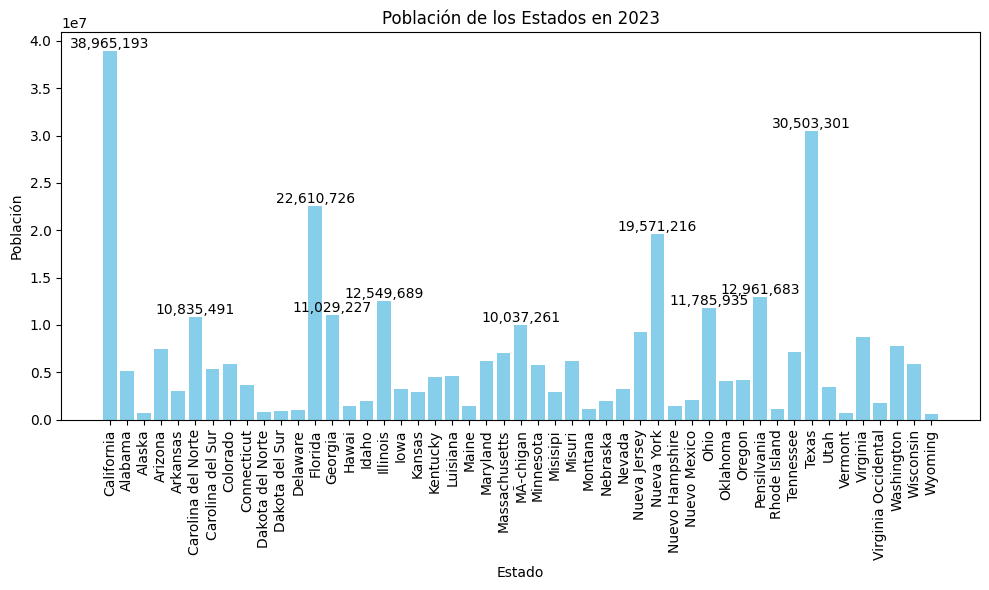

In [82]:
top_5_states = df_2023.nlargest(10, 'Poblacion')

# Crear el gráfico de barras con todos los estados
plt.figure(figsize=(10, 6))
bars = plt.bar(df_2023['ESTADO'], df_2023['Poblacion'], color='skyblue')
plt.xlabel('Estado')
plt.ylabel('Población')
plt.title('Población de los Estados en 2023')
plt.xticks(rotation=90)

# Añadir los valores de población encima de las barras solo para los 5 estados con mayor población
for bar, estado in zip(bars, df_2023['ESTADO']):
    if estado in top_5_states['ESTADO'].values:
        yval = bar.get_height()
        yval_formatted = f'{yval:,.0f}'  # Formatear con puntos para separar los miles
        plt.text(bar.get_x() + bar.get_width()/2, yval, yval_formatted, va='bottom', ha='center', fontsize=10)

plt.tight_layout()
plt.show()

## Población 

- La población de una región indica el tamaño del mercado potencial disponible para un negocio. Una mayor población sugiere un mercado más grande con más clientes potenciales, lo que puede traducirse en mayores oportunidades de ventas y crecimiento. Por ejemplo, abrir un negocio en una ciudad con una gran población podría atraer a más clientes y generar más ingresos en comparación con una localidad con una población más pequeña.

- En estados con grandes poblaciones como lo son California, Texas, Florida,New York y Pensilvania se tiene una base amplia de clientes potenciales. Esto aumenta la posibilidad de atraer una cantidad significativa de clientes y generar ventas consistentes.

- Más personas en una área significa mayor exposición para el negocio, lo que puede facilitar que el negocio sea conocido y se convierta en un punto de referencia local.

- Las campañas publicitarias pueden beneficiarse dado la mayor concentración de audiencia. La publicidad en medios locales, como televisión, radio, y redes sociales, puede alcanzar a una gran cantidad de personas de manera más efectiva.

- En regiones con alta población, los negocios pueden beneficiarse de economías de escala. La producción y operación en grandes volúmenes pueden reducir los costos unitarios. Esto significa que un negocio puede operar de manera más eficiente y con mayores márgenes de ganancia en áreas con alta densidad poblacional debido al mayor volumen de ventas.

- La densidad poblacional y el tamaño de la población pueden influir en la competencia en el mercado. En áreas con alta población, es posible que haya una mayor concentración de competidores, lo que puede aumentar la competencia pero también validar la demanda de productos o servicios similares. En contraste, en áreas con baja población, la competencia puede ser menor, pero la demanda también podría ser más limitada.


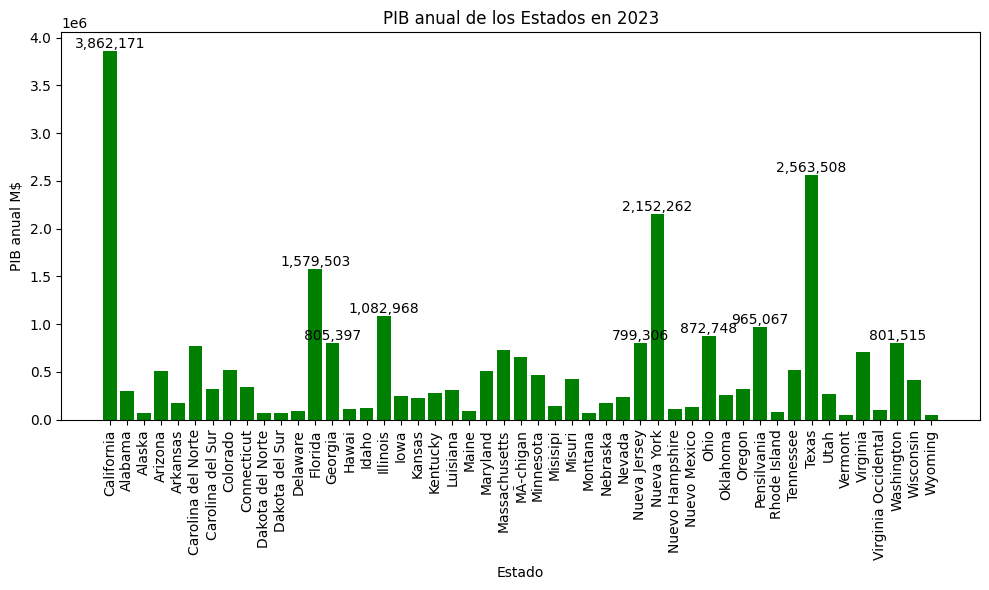

In [84]:
top_5_states = df_2023.nlargest(10, 'PIB anual M$')

# Crear el gráfico de barras con todos los estados
plt.figure(figsize=(10, 6))
bars = plt.bar(df_2023['ESTADO'], df_2023['PIB anual M$'], color='green')
plt.xlabel('Estado')
plt.ylabel('PIB anual M$')
plt.title('PIB anual de los Estados en 2023')
plt.xticks(rotation=90)

# Añadir los valores de población encima de las barras solo para los 5 estados con mayor población
for bar, estado in zip(bars, df_2023['ESTADO']):
    if estado in top_5_states['ESTADO'].values:
        yval = bar.get_height()
        yval_formatted = f'{yval:,.0f}'  # Formatear con puntos para separar los miles
        plt.text(bar.get_x() + bar.get_width()/2, yval, yval_formatted, va='bottom', ha='center', fontsize=10)

plt.tight_layout()
plt.show()

## Producto Interno Bruto

El PIB indica el tamaño y la salud económica de un estado. Un PIB alto sugiere una economía fuerte con una alta capacidad de gasto, lo cual es favorable para negocios que buscan mercados con poder adquisitivo.

### Descripción Grafica 

De acuerdo a la grafica, el estado con mayor PIB en el año 2023 fue California con un PIB de 3.862.171 M$. Seguido muy de lejos por Texas con 2.563.508 M$ y Nueva York con 
2.152.262 M$

## Beneficios de un PIB alto para un negocio

- Los estados con un alto PIB pueden permitirse realizar grandes inversiones en infraestructura, como transporte, tecnología y energía, que a su vez fomentan el crecimiento económico. Este entorno favorable que crean, sirve para el crecimiento de empresas y startups. La disponibilidad de capital y recursos fomenta el emprendimiento y la innovación.

- De igual forma este tipo de estados suelen tener un alto poder adquisitivo entre sus habitantes. Esto significa que los consumidores están dispuestos a gastar más en bienes y servicios, lo que puede traducirse en mayores ventas e ingresos para el negocio.

### Poblacion y PIB

La alta población y el poder adquisitivo en estados como California proporcionan un mercado grande y diversificado para los productos o servicios de un negocio, facilitando su escalabilidad.

La presencia de múltiples sectores económicos en estos estados permite al negocio diversificar sus ofertas y adaptarse a diferentes segmentos del mercado.

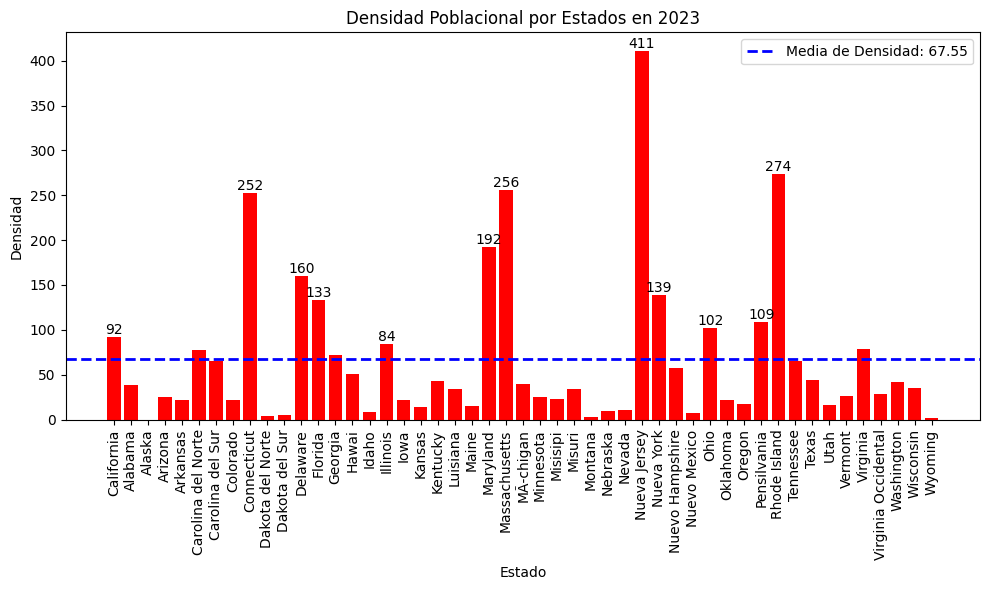

In [85]:
mean_density = df_2023['Densidad'].mean()

# Filtrar los 12 estados con mayor densidad
top_5_states = df_2023.nlargest(12, 'Densidad')

# Crear el gráfico de barras con todos los estados
plt.figure(figsize=(10, 6))
bars = plt.bar(df_2023['ESTADO'], df_2023['Densidad'], color='red')
plt.xlabel('Estado')
plt.ylabel('Densidad')
plt.title('Densidad Poblacional por Estados en 2023')
plt.xticks(rotation=90)

# Añadir la línea de la media de densidades
plt.axhline(y=mean_density, color='blue', linestyle='--', linewidth=2, label=f'Media de Densidad: {mean_density:.2f}')

# Añadir los valores de densidad encima de las barras solo para los 5 estados con mayor densidad
for bar, estado in zip(bars, df_2023['ESTADO']):
    if estado in top_5_states['ESTADO'].values:
        yval = bar.get_height()
        yval_formatted = f'{yval:,.0f}'  # Formatear con puntos para separar los miles
        plt.text(bar.get_x() + bar.get_width() / 2, yval, yval_formatted, va='bottom', ha='center', fontsize=10)

# Añadir la leyenda
plt.legend()

plt.tight_layout()
plt.show()

## Densidad Poblacional
Es la Cantidad de personas que en promedio habitan por kilómetros cuadrados un area determinada. Tomamos esta variable para evalúaR la viabilidad de abrir un nuevo negocio o expandirse en una determinada área dado que: 

## Beneficios de una densidad Poblacional alta para un negocio

- Los estados con alta densidad poblacional tienen un mayor número de personas por área, lo que significa más clientes potenciales en un radio más pequeño. Esto puede traducirse en mayores ventas y una base de clientes más estable.

- Una mayor concentración de personas generalmente se traduce en una mayor demanda de productos y servicios, lo que puede llevar a un flujo constante de clientes y mayores ingresos.

- En lugares con alta densidad,los costos fijos, como el alquiler y los servicios, pueden distribuirse entre más clientes, lo que mejora la rentabilidad.

- En áreas densamente pobladas, el Marketing digital con sus respectivas estrategias de comunicación por redes puede ser más eficiente porque un anuncio puede llegar a más personas en un área más pequeña, reduciendo los costos por impresión o impacto

### Descripción Grafica 

- Dentro de la grafica podemos visulizar que los Estados con mayor densidad Poblacional son Nueva Jersey,Rhode Island,Connecticut, Massachusetts y Maryland

- La media de la densidad de todos los estados es de 67.55 personas por kilometro cuadrado

- De los estados con mayor Población y PIB encontramos por encima de la media de densidad a New York, Florida, California e Illinois.

### Densidad Poblacional y PIB

la combinación de un alto PIB y una alta densidad poblacional puede crear un entorno económico dinámico y próspero, ofreciendo un mercado vasto y diverso para negocios de todos los sectores. Por esta razon estados como New York, Florida, California e Illinois toman mas fuerza a la hora de decidir cual escoger para nuestro analisis. 


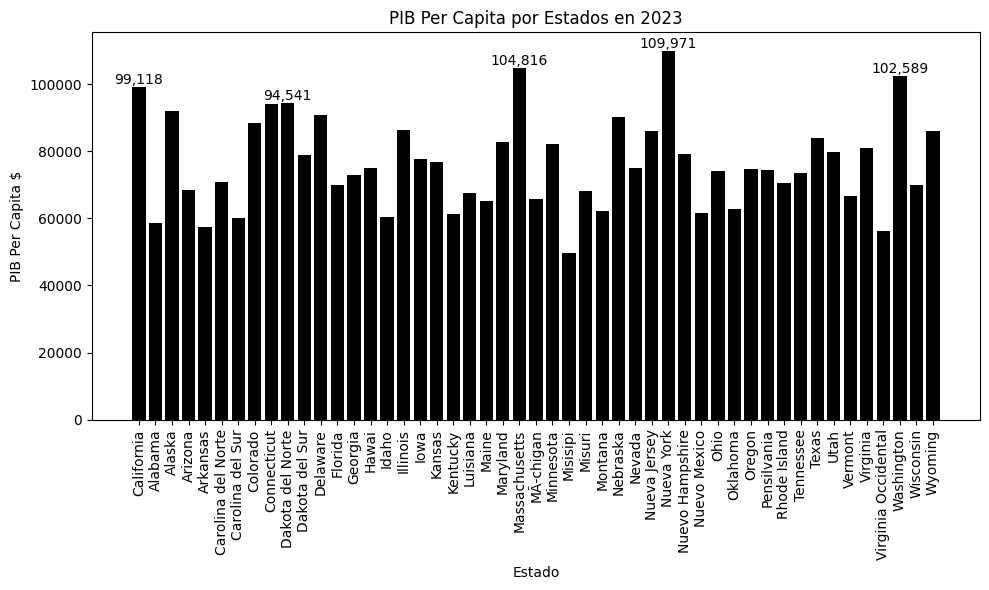

In [87]:
top_5_states = df_2023.nlargest(5, 'PIB Per Capita $')

# Crear el gráfico de barras con todos los estados
plt.figure(figsize=(10, 6))
bars = plt.bar(df_2023['ESTADO'], df_2023['PIB Per Capita $'], color='black')
plt.xlabel('Estado')
plt.ylabel('PIB Per Capita $')
plt.title('PIB Per Capita por Estados en 2023')
plt.xticks(rotation=90)

# Añadir los valores de población encima de las barras solo para los 5 estados con mayor población
for bar, estado in zip(bars, df_2023['ESTADO']):
    if estado in top_5_states['ESTADO'].values:
        yval = bar.get_height()
        yval_formatted = f'{yval:,.0f}'  # Formatear con puntos para separar los miles
        plt.text(bar.get_x() + bar.get_width()/2, yval, yval_formatted, va='bottom', ha='center', fontsize=10)

plt.tight_layout()
plt.show()

## PIB per capita

El PIB per cápita proporciona una visión de la renta media de los residentes de un
Estado. Un PIB per cápita alto indica un alto nivel de ingresos individuales o lo que se conoce como mayor poder adquisitivo. 

Tomamos esta variable en nuestro analisis para poder identificar los estados que tengan mercados mas desarrollados capaces de soportar negocios que ofrezcan productos o servicios sin importar si son o no de lujo o premium 

En la grafica podemos observar que los estados con mayor PIB per capita son: New York, Massachusetts, Washington y California. Esto puede llegar a indicar que en estos estados dados los altos ingresos de sus habitantes,existe un mayor consumo de bienes y servicios.

## Beneficios de una PIB per capita alto para un negocio

- Una alta capacidad adquisitiva permite a un negocio diversificar su oferta de productos y servicios para satisfacer diferentes segmentos del mercado.

- Un PIB per cápita alto suele indicar una economía estable y en crecimiento, lo que proporciona un entorno empresarial más predecible y seguro.



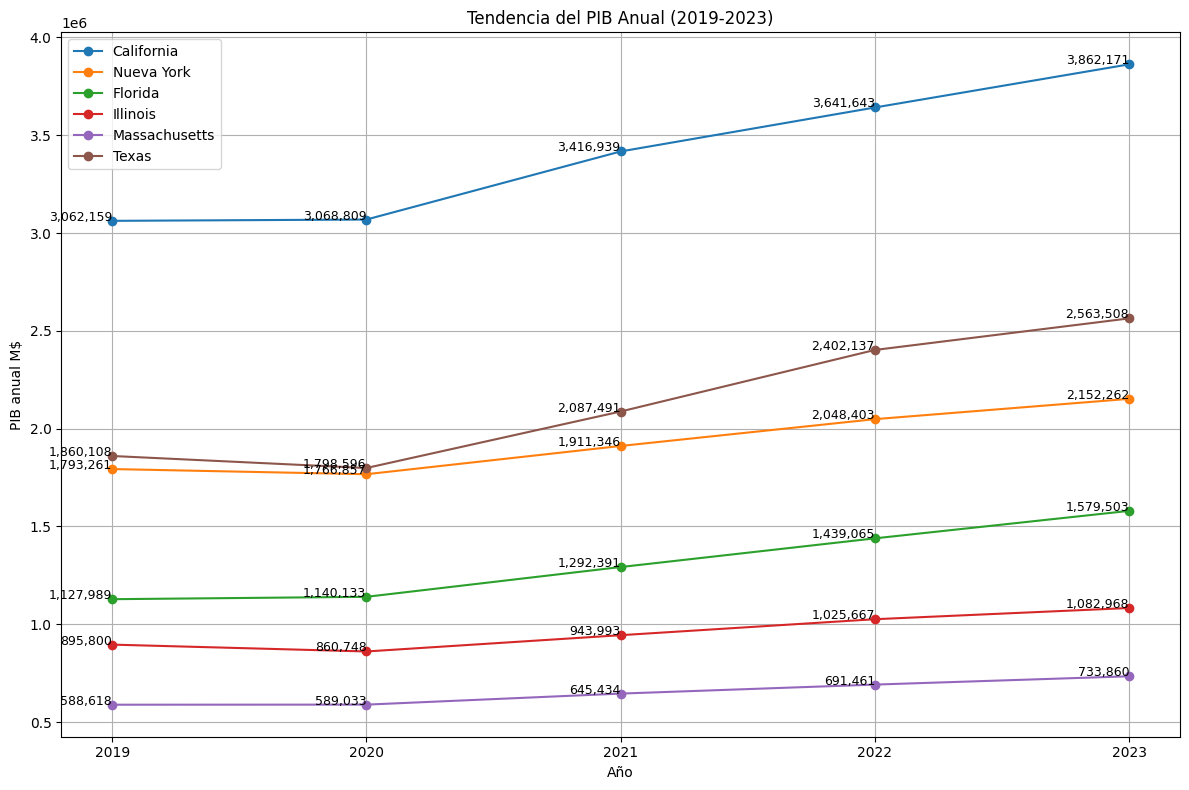

In [88]:
# Lista de estados de interés
estados_interes = ['California', 'Nueva York', 'Florida', 'Illinois', 'Massachusetts', 'Texas']
# Filtrar los datos para incluir solo los estados de interés
df_filtrado = df_macro[df_macro['ESTADO'].isin(estados_interes)]

# Crear la gráfica de tendencia
plt.figure(figsize=(12, 8))

# Graficar cada estado por separado
for estado in estados_interes:
    df_estado = df_filtrado[df_filtrado['ESTADO'] == estado]
    plt.plot(df_estado['Fecha'], df_estado['PIB anual M$'], marker='o', label=estado)
    
    # Mostrar los valores en cada punto
    for x, y in zip(df_estado['Fecha'], df_estado['PIB anual M$']):
        plt.text(x, y, f'{y:,.0f}', fontsize=9, ha='right')

plt.xlabel('Año')
plt.ylabel('PIB anual M$')
plt.title('Tendencia del PIB Anual (2019-2023)')
plt.legend()
plt.grid(True)

# Asegurarse de que los años se muestren sin decimales y evitar duplicaciones
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x)}'))
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True))

plt.tight_layout()
plt.show()

Conclusión de sección

# ¿Por qué California?


California, siendo el estado con la mayor población y el PIB más alto de los 50 estados de EE.UU., representa una de las economías más grandes y dinámicas a nivel nacional. Su perfil económico y demográfico ofrece una oportunidad única para la creación o expansión de negocios.

- Cuenta con una población considerablemente grande, lo cual se traduce en un mercado amplio con una base de consumidores extensa. Este gran número de habitantes significa una mayor demanda potencial para una variedad de productos y servicios. Además, una mayor población implica una diversidad de segmentos de mercado, lo cual puede permitir a las empresas adaptar sus ofertas a diferentes necesidades y preferencias.

- El elevado PIB de California indica que el estado tiene una economía robusta y de alto rendimiento. Esto sugiere un ambiente empresarial favorable, con un alto poder adquisitivo entre los residentes. Un PIB alto generalmente está asociado con una mayor capacidad de gasto y una infraestructura económica avanzada, lo que facilita la operación y el crecimiento de nuevos negocios.

- El alto PIB per cápita en California refleja una población con un ingreso medio superior. Esto es crucial para las empresas que buscan ingresar a un mercado donde los consumidores tienen la capacidad financiera para adquirir productos y servicios premium. Un alto PIB per cápita indica un mercado con un mayor poder adquisitivo, lo cual es atractivo para negocios que ofrecen bienes y servicios de alta gama.


- California también se destaca por su alta densidad poblacional en ciertas áreas, como Los Ángeles y San Francisco. Esto significa que hay una concentración significativa de personas en zonas específicas, lo que puede resultar en una mayor visibilidad y accesibilidad para los negocios. Una alta densidad poblacional puede facilitar la captación de clientes y maximizar la eficiencia de las estrategias de marketing al enfocarse en áreas de alta concentración de consumidores.

# CALIFORNIA

In [116]:
df_california

,user_id,name,time,rating,text,pics,resp,gmap_id
0,108991152262655788985,Song Ro,1609909927056,5,Love there korean rice cake.,None,None,0x80c2c778e3b73d33:0xbdc58662a4a97d49
1,111290322219796215751,Rafa Robles,1612849648663,5,Good very good,None,None,0x80c2c778e3b73d33:0xbdc58662a4a97d49
2,112640357449611959087,David Han,1583643882296,4,They make Korean traditional food very properly.,None,None,0x80c2c778e3b73d33:0xbdc58662a4a97d49
3,117440349723823658676,Anthony Kim,1551938216355,5,Short ribs are very delicious.,None,None,0x80c2c778e3b73d33:0xbdc58662a4a97d49
4,100580770836123539210,Mario Marzouk,1494910901933,5,Great food and prices the portions are large,None,None,0x80c2c778e3b73d33:0xbdc58662a4a97d49
...,...,...,...,...,...,...,...,...
2549995,111342337087018931578,Byunguk Kim,1573362674409,5,None,None,None,0x80c2bea30829f279:0x39aa953ee93734ed
2549996,108081820251273699976,Ceveda Craytonhooks,1580608853411,5,Beautiful salon. The staff and atmosphere were...,None,None,0x8094675073616747:0x9f935a9b9046a9ba
2549997,117591383135333249676,Natacha Thompson,1528597806165,5,Flo is a great beautician. She is very patie...,[{'url': ['https://lh5.googleusercontent.com/p...,{'text': 'Thank you! It was my pleasure to gi...,0x8094675073616747:0x9f935a9b9046a9ba
2549998,112426610655792883265,Eleanor Aikins,1551203379295,5,I Been going to have a variety of hair style a...,None,None,0x8094675073616747:0x9f935a9b9046a9ba


Conversión preliminar de 'time' para detección de outliers.

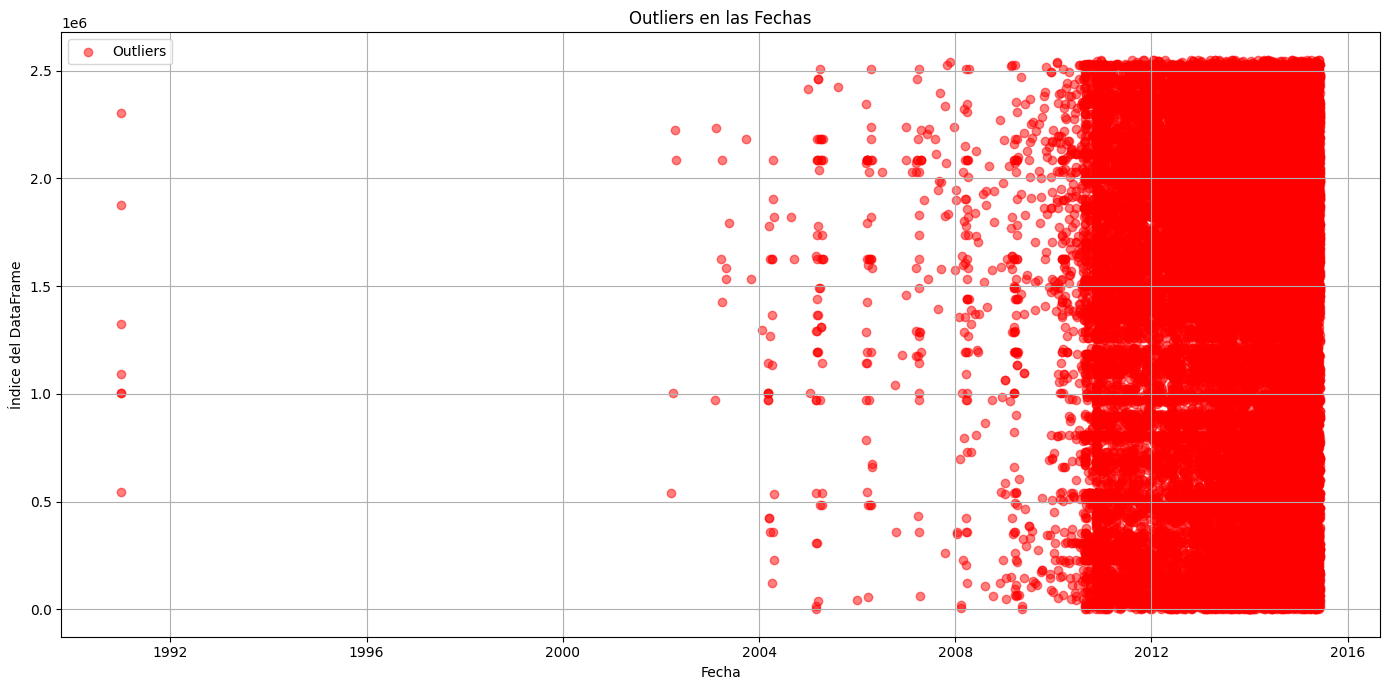

In [117]:
# Convertir la columna 'time' a fechas reales
df_california['date'] = pd.to_datetime(df_california['time'], unit='ms')

# Convertir las fechas a valores numéricos (timestamp en segundos) para análisis estadístico
df_california['timestamp'] = df_california['date'].astype('int64') / 10**9  # Convertir a segundos

# Calcular el rango intercuartílico (IQR)
Q1 = df_california['timestamp'].quantile(0.25)
Q3 = df_california['timestamp'].quantile(0.75)
IQR = Q3 - Q1

# Determinar los límites para detectar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar los outliers
outliers = df_california[(df_california['timestamp'] < lower_bound) | (df_california['timestamp'] > upper_bound)]

# Convertir los timestamps de vuelta a fechas para mejor interpretación
outliers['date'] = pd.to_datetime(outliers['timestamp'], unit='s')

# Graficar los outliers
plt.figure(figsize=(14, 7))
plt.scatter(outliers['date'], outliers.index, alpha=0.5, color='red', label='Outliers')

# Añadir etiquetas y título
plt.xlabel('Fecha')
plt.ylabel('Índice del DataFrame')
plt.title('Outliers en las Fechas')
plt.legend()
plt.grid(True)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

# Nulos

In [119]:
df_california.isnull().sum()

user_id            0
name               0
time               0
rating             0
text         1103898
pics         2456165
resp         2317095
gmap_id            0
date               0
timestamp          0
dtype: int64

In [120]:
print(df_california[df_california.isnull().any(axis=1)])

                       user_id                 name           time  rating  \
0        108991152262655788985              Song Ro  1609909927056       5   
1        111290322219796215751          Rafa Robles  1612849648663       5   
2        112640357449611959087            David Han  1583643882296       4   
3        117440349723823658676          Anthony Kim  1551938216355       5   
4        100580770836123539210        Mario Marzouk  1494910901933       5   
...                        ...                  ...            ...     ...   
2549994  112272076740532470713          Krish Munot  1514053532088       4   
2549995  111342337087018931578          Byunguk Kim  1573362674409       5   
2549996  108081820251273699976  Ceveda Craytonhooks  1580608853411       5   
2549998  112426610655792883265       Eleanor Aikins  1551203379295       5   
2549999  112219943666423225464            Thai Love  1553880485978       5   

                                                      text  pic

## Vacíos

In [121]:
warnings.filterwarnings('ignore')

In [122]:
def is_empty(x):
    if x is None:
        return True
    elif isinstance(x, (str, list, dict, set, np.ndarray)) and len(x) == 0:
        return True
    return False

# Aplicar la función al DataFrame
empty_mask = df_california.applymap(is_empty)

# Ver el número de valores vacíos en cada columna
print("\nValores vacíos por columna:")
print(empty_mask.sum())

# Ver las filas que contienen valores vacíos
print("\nFilas con valores vacíos:")
print(df_california[empty_mask.any(axis=1)])


Valores vacíos por columna:
user_id            0
name               0
time               0
rating             0
text         1103898
pics         2456165
resp         2317095
gmap_id            0
date               0
timestamp          0
dtype: int64

Filas con valores vacíos:
                       user_id                 name           time  rating  \
0        108991152262655788985              Song Ro  1609909927056       5   
1        111290322219796215751          Rafa Robles  1612849648663       5   
2        112640357449611959087            David Han  1583643882296       4   
3        117440349723823658676          Anthony Kim  1551938216355       5   
4        100580770836123539210        Mario Marzouk  1494910901933       5   
...                        ...                  ...            ...     ...   
2549994  112272076740532470713          Krish Munot  1514053532088       4   
2549995  111342337087018931578          Byunguk Kim  1573362674409       5   
2549996  1080818202

# Tipos de datos

In [123]:
#Evaluamos con qué tipo de datos contamos. Nos interesa buscar especialmente cadenas de texto y números enteros
print(df_california.dtypes)

user_id              object
name                 object
time                  int64
rating                int64
text                 object
pics                 object
resp                 object
gmap_id              object
date         datetime64[ns]
timestamp           float64
dtype: object


# Metadatos

In [124]:
#Las siguientes celdas muestras información general del dataset
df_california.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2550000 entries, 0 to 2549999
Data columns (total 10 columns):
 #   Column     Dtype         
---  ------     -----         
 0   user_id    object        
 1   name       object        
 2   time       int64         
 3   rating     int64         
 4   text       object        
 5   pics       object        
 6   resp       object        
 7   gmap_id    object        
 8   date       datetime64[ns]
 9   timestamp  float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 194.5+ MB


In [125]:
#imprimir las dimensiones del data frame
print(df_california.shape)

(2550000, 10)


In [126]:
#Visualización de los nombres de las columnas
print(df_california.columns)

Index(['user_id', 'name', 'time', 'rating', 'text', 'pics', 'resp', 'gmap_id',
       'date', 'timestamp'],
      dtype='object')


In [127]:
# Datos estadísticos
print(df_california.describe())       #Se procederá en el ETL a transformar la notación

               time        rating                           date     timestamp
count  2.550000e+06  2.550000e+06                        2550000  2.550000e+06
mean   1.551568e+12  4.314333e+00  2019-03-02 23:07:15.972602368  1.551568e+09
min    6.626016e+11  1.000000e+00            1990-12-31 00:00:00  6.626016e+08
25%    1.522986e+12  4.000000e+00  2018-04-06 03:42:18.627749888  1.522986e+09
50%    1.555299e+12  5.000000e+00  2019-04-15 03:29:26.999500032  1.555299e+09
75%    1.582410e+12  5.000000e+00  2020-02-22 22:23:08.726749952  1.582410e+09
max    1.631149e+12  5.000000e+00     2021-09-09 01:00:32.337000  1.631149e+09
std    4.658100e+10  1.127482e+00                            NaN  4.658100e+07


In [130]:
#Muestra de valores únicos de ID de usuarios
unique_misc = df_california['user_id'].unique()
print(len(unique_misc))


949922


In [131]:
#Muestra de valores únicos de ID de locación
unique_misc = df_california['gmap_id'].unique()
print(len(unique_misc))

71356


# Duplicados

In [132]:
#Crear una lista para almacenar las columnas que causaron problemas
columnas_problema = []

def check_duplicates(dataframe):
    global columnas_problema
    
    # Crear una lista para almacenar las columnas que se pueden procesar
    columnas_procesables = []

    for col in dataframe.columns:
        try:
            # Intentar acceder a los datos de la columna
            df_california[columnas_procesables].append(col)
        except Exception as e:
            columnas_problema.append(col)
            

    # Crear un DataFrame solo con las columnas procesables
    df_procesable = dataframe[columnas_procesables]
    
    # Verificar duplicados en el DataFrame procesable
    try:
        duplicados = df_procesable.duplicated()
        num_duplicados = duplicados.sum()
        if num_duplicados > 0:
            print(f"Número de filas duplicadas en el DataFrame: {num_duplicados}")
            print("Filas duplicadas:")
            print(dataframe[duplicados])
        else:
            print("No hay filas duplicadas en el DataFrame.")
    except Exception as e:
        print(f"Error al verificar duplicados en el DataFrame procesable: {e}")

# Verificar duplicados en el DataFrame
check_duplicates(df_california)

# Listar las columnas problemáticas
if columnas_problema:
    print("Columnas que no pueden ser accedidas:")
    for col in columnas_problema:
        print(col)
        

No hay filas duplicadas en el DataFrame.
Columnas que no pueden ser accedidas:
user_id
name
time
rating
text
pics
resp
gmap_id
date
timestamp


# Outliers

In [133]:
# Función para calcular outliers usando el rango intercuartílico (IQR)
def calculate_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return series[(series < lower_bound) | (series > upper_bound)]

# Aplicar la función a la columna `rating`
rating_outliers = calculate_outliers_iqr(df_california['rating'])
print("Outliers en rating:")
print(rating_outliers)

Outliers en rating:
7          1
14         1
20         1
44         1
62         1
          ..
2549978    1
2549980    1
2549981    1
2549984    1
2549986    1
Name: rating, Length: 226590, dtype: int64


In [134]:
# Aplicar la función a la columna `time`
time_outliers = calculate_outliers_iqr(df_california['time'])
print("Outliers en time:")
print(time_outliers)


Outliers en time:
160        1397679104451
184        1366427331627
187        1366427331627
263        1324144190767
353        1387157158847
               ...      
2549332    1327098005823
2549333    1326622532061
2549646    1319651379908
2549753    1293085127376
2549970    1351005640089
Name: time, Length: 34115, dtype: int64


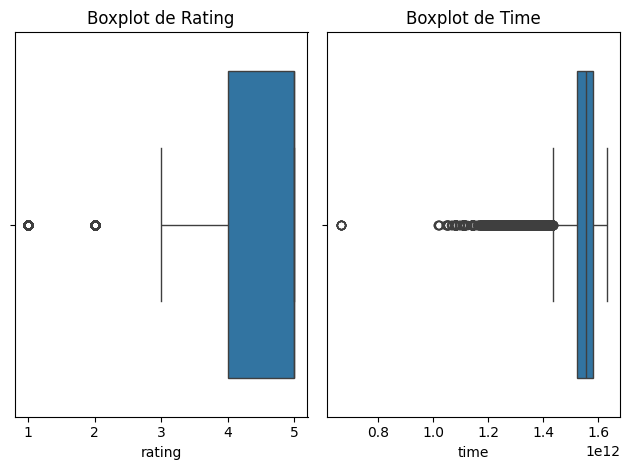

In [135]:
# Boxplot para la columna 'rating'
plt.subplot(1, 2, 1)
sns.boxplot(data=df_california, x='rating')
plt.title('Boxplot de Rating')

# Boxplot para la columna 'time'
plt.subplot(1, 2, 2)
sns.boxplot(data=df_california, x='time')
plt.title('Boxplot de Time')

# Mostrar los gráficos
plt.tight_layout()
plt.show()

Boxplot de Rating:

La escala va de 1 a 5, lo que sugiere que podría ser una escala de calificación típica.
La mediana (línea horizontal dentro de la caja) está cerca de 4.
La caja, que representa el rango intercuartílico (IQR), se extiende aproximadamente de 3.5 a 5.
Hay algunos valores atípicos (outliers) en el extremo inferior, representados por círculos cerca de 1 y 2.
La distribución parece estar sesgada hacia los valores más altos, ya que la caja está más comprimida en la parte superior.


Boxplot de Time:

La mediana está cerca de 1.4.
La caja es muy estrecha, lo que indica que el 50% central de los datos está muy concentrado.
Hay una gran cantidad de valores atípicos en el extremo inferior, representados por múltiples círculos superpuestos.
La distribución parece estar muy sesgada, con la mayoría de los datos concentrados en valores más altos y una "cola" larga hacia los valores más bajos.

Las calificaciones tienden a ser altas, con la mayoría entre 3.5 y 5, pero con algunos valores bajos atípicos.
Los tiempos están muy concentrados alrededor de un valor alto, pero hay muchos casos atípicos con tiempos significativamente menores.

# Distribución del rating

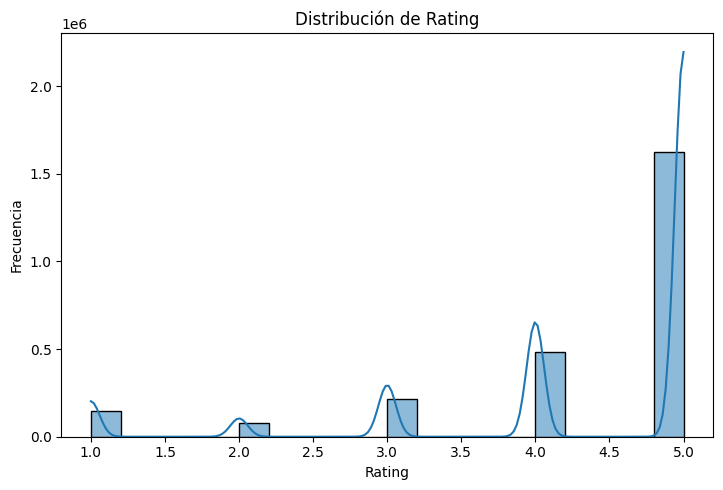

In [136]:
# Crear una figura con dos subgráficas
plt.figure(figsize=(14, 5))

# Histograma y gráfico de densidad para la columna 'rating'
plt.subplot(1, 2, 1)
sns.histplot(df_california['rating'], kde=True, bins=20)
plt.title('Distribución de Rating')
plt.xlabel('Rating')
plt.ylabel('Frecuencia')


# Mostrar los gráficos
plt.tight_layout()
plt.show()


Hay dos picos principales, uno en 5.0 y otro menor en 4.0, lo que sugiere una distribución bimodal.
El rating de 5.0 tiene la frecuencia más alta, superando los 2 millones de ocurrencias.
Hay un pico secundario en 4.0, con alrededor de 0.5 millones de ocurrencias.
Hay frecuencias relativamente bajas para los ratings de 1.0, 2.0 y 3.0, aunque 1.0 tiene una frecuencia ligeramente mayor que 2.0 y 3.0.
La distribución está fuertemente sesgada hacia los ratings altos (4 y 5).
La gran diferencia entre las frecuencias de 5.0 y las demás sugiere una tendencia a dar calificaciones extremadamente positivas.

Esta distribución es típica en sistemas de calificación online, donde los usuarios tienden a dar calificaciones muy altas o muy bajas, con menos calificaciones intermedias.

Se toma con precaución el rango temporal en que fueron tomados los datos debido a los outliers de la columna 'time'.

# Nube de palabras de reseñas

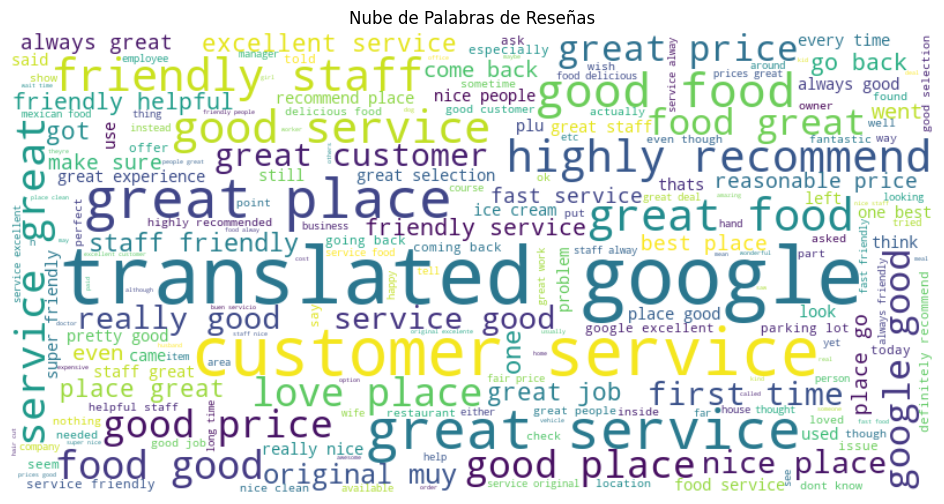

In [137]:
# Función para limpiar el texto
def clean_text(text):
    text = text.lower()  # Convertir a minúsculas
    text = text.translate(str.maketrans('', '', string.punctuation))  # Eliminar puntuación
    words = word_tokenize(text)  # Tokenizar
    stop_words = set(stopwords.words('english'))  # Stopwords en inglés
    words = [word for word in words if word not in stop_words]  # Eliminar stopwords
    return ' '.join(words)

# Unir todas las reseñas en una sola cadena de texto
all_text = ' '.join(df_california['text'].dropna().apply(clean_text))

# Crear la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Mostrar la nube de palabras
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Ocultar los ejes
plt.title('Nube de Palabras de Reseñas')
plt.show()

Palabras más prominentes:
"great" (grande, excelente): Es la palabra más destacada, apareciendo en varios tamaños y colores.
"food" (comida): Muy prominente, sugiriendo que las reseñas son mayormente sobre restaurantes.
"service" (servicio): También muy destacada, indicando la importancia de la atención al cliente.
"place" (lugar): Bastante visible, posiblemente refiriéndose al establecimiento en general.
"google": Notablemente grande, ya que se trata de reseñas de Google Maps.

Otras palabras frecuentes:
"friendly" (amigable)
"staff" (personal)
"good" (bueno)
"recommend" (recomendar)
"translated" (traducido): Interesante, podría indicar que algunas reseñas fueron traducidas automáticamente.
"customer" (cliente)
"price" (precio)

Sentimientos expresados:
Predominantemente positivos: "love", "excellent", "best", "helpful", "nice".
Algunas palabras neutras: "first time", "back" (posiblemente "come back" o "went back").
No se observan palabras negativas prominentes.

Aspectos del servicio mencionados:
"staff" y "friendly" sugieren un enfoque en el trato del personal.
"price" indica que el costo es un factor importante.
"experience" sugiere que los clientes evalúan la experiencia general.

Frecuencia y tiempo:
"always" y "every time" indican consistencia en la experiencia.
"first time" sugiere que hay reseñas de clientes nuevos.

Acción y recomendación:
"recommend" y "highly recommend" son prominentes, indicando que muchos clientes recomiendan el lugar o servicio.
"coming back" sugiere la intención de regresar, lo cual es positivo.

Esta nube de palabras sugiere que las reseñas son generalmente muy positivas, con un fuerte énfasis en la calidad de la comida, el servicio y la experiencia general. 

# Número de reseñas por usuario

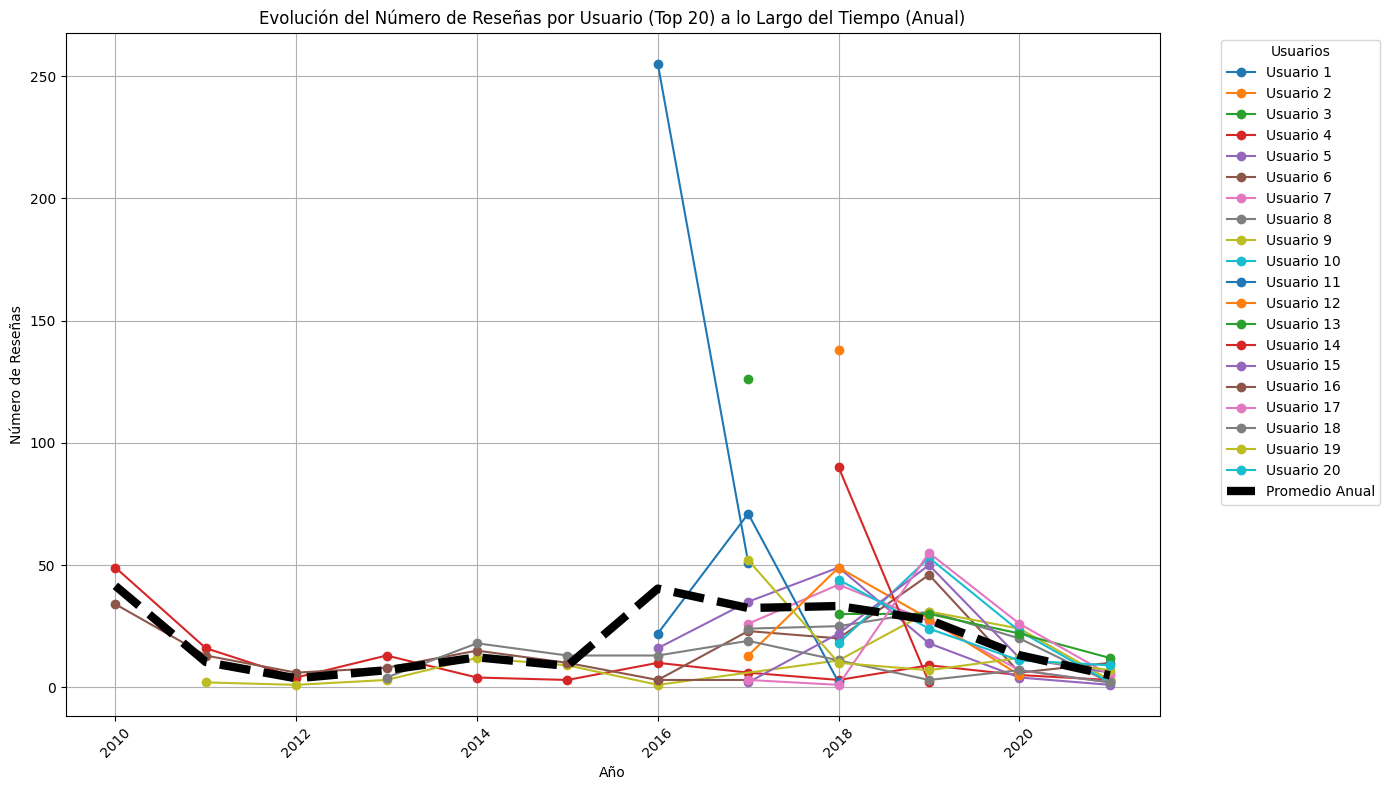

In [139]:
# Convertir el tiempo en formato de fecha
df_california['date'] = pd.to_datetime(df_california['time'], unit='ms')

# Extraer el año
df_california['year'] = df_california['date'].dt.year

# Contar el número de reseñas por usuario y seleccionar los 20 principales
review_counts = df_california['user_id'].value_counts().head(20)

# Filtrar el DataFrame para solo los 20 usuarios principales
top_users = review_counts.index.tolist()
df_top_users = df_california[df_california['user_id'].isin(top_users)]

# Calcular el número de reseñas por usuario por año
review_counts_by_year = df_top_users.groupby(['user_id', 'year']).size().reset_index(name='counts')

# Ordenar los años
review_counts_by_year = review_counts_by_year.sort_values(by='year')

# Calcular el promedio de reseñas por año
average_reviews_per_year = review_counts_by_year.groupby('year')['counts'].mean().reset_index(name='average_counts')

# Graficar
plt.figure(figsize=(14, 8))

# Graficar las reseñas por usuario
for idx, user_id in enumerate(top_users):
    user_data = review_counts_by_year[review_counts_by_year['user_id'] == user_id]
    plt.plot(user_data['year'], user_data['counts'], marker='o', label=f'Usuario {idx + 1}')

# Graficar la línea de promedio
plt.plot(average_reviews_per_year['year'], average_reviews_per_year['average_counts'], color='black', linestyle='--', linewidth=6, label='Promedio Anual')

# Configurar el gráfico
plt.title('Evolución del Número de Reseñas por Usuario (Top 20) a lo Largo del Tiempo (Anual)')
plt.xlabel('Año')
plt.ylabel('Número de Reseñas')
plt.xticks(rotation=45)
plt.legend(title='Usuarios', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

Hay una gran variabilidad entre usuarios y años, pero se observa un pico notable en 2016 seguido de una tendencia decreciente.
Pico destacado: El Usuario 1 muestra un pico extraordinario en 2016 con más de 250 reseñas, muy por encima del resto. (Outlier a evaluar)
En 2010, varios usuarios (especialmente 1, 3 y 14) muestran una actividad significativa que luego disminuye.
Entre 2012 y 2014, la actividad es generalmente baja para la mayoría de los usuarios.
A partir de 2016, se observa un aumento general en la actividad de reseñas para varios usuarios.
Promedio anual: La línea negra gruesa representa el promedio anual, mostrando una tendencia general que refleja los patrones de actividad colectivos.
Tendencia reciente: Hacia 2020-2022, la actividad parece estabilizarse en niveles más bajos para la mayoría de los usuarios.
Variabilidad individual: Algunos usuarios muestran patrones muy irregulares, con picos aislados en ciertos años.

En resumen, el gráfico muestra una dinámica compleja de la actividad de reseñas, con períodos de alta variabilidad y cambios significativos en los patrones de participación de los usuarios a lo largo del tiempo.

# Promedio de calificaciones por mes

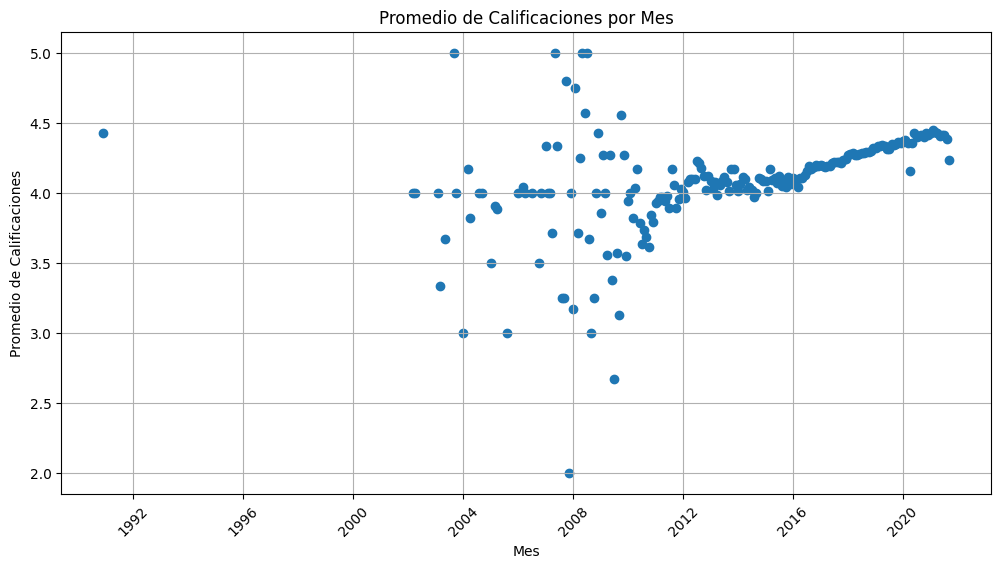

In [141]:
# Convertir el tiempo en formato de fecha
df_california['date'] = pd.to_datetime(df_california['time'], unit='ms')

# Extraer año y mes
df_california['year_month'] = df_california['date'].dt.to_period('M')

# Calcular el promedio de calificaciones por mes
monthly_ratings = df_california.groupby('year_month')['rating'].mean().reset_index()

# Convertir el 'year_month' a formato datetime para usar en el gráfico
monthly_ratings['year_month'] = monthly_ratings['year_month'].dt.to_timestamp()

# Graficar
plt.figure(figsize=(12, 6))
plt.scatter(monthly_ratings['year_month'], monthly_ratings['rating'])
plt.title('Promedio de Calificaciones por Mes')
plt.xlabel('Mes')
plt.ylabel('Promedio de Calificaciones')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

A largo plazo, se observa una ligera tendencia al alza en las calificaciones promedio.
Hay una gran variabilidad en los datos, especialmente en el período entre 2000 y 2010, donde se ven fluctuaciones extremas.

Inicio de los 90s hasta finales de los 90s: Aumento constante y suave.
Alrededor del 2000: Caída brusca seguida de alta volatilidad.
2010 en adelante: Estabilización relativa con un aumento gradual.

Los promedios parecen oscilar principalmente entre 3.0 y 5.0.
Se observan algunos picos notables que llegan a 5.0, así como caídas pronunciadas, con el punto más bajo cerca de 2.75.
En los últimos años, parece haber una tendencia más estable y ligeramente ascendente.
Hay algunos puntos de datos que parecen ser valores atípicos, especialmente durante el período de alta volatilidad.

Este gráfico sugiere que ha habido cambios significativos en el sistema de calificación o en los factores que afectan las calificaciones a lo largo del tiempo.

 "- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - "

La mayoría de las calificaciones se agrupan en los valores extremos, con una clara predominancia de calificaciones de 5.0 (más de 2 millones de ocurrencias) y un pico secundario en 4.0 (alrededor de 0.5 millones).
Las calificaciones intermedias (1.0, 2.0 y 3.0) son menos frecuentes, con una notable inclinación hacia calificaciones muy altas (4.0 y 5.0). Esto sugiere que los usuarios tienden a dar calificaciones extremadamente positivas o muy negativas.

A lo largo del tiempo, se observa una ligera tendencia al alza en las calificaciones promedio, a pesar de la alta variabilidad y algunos picos y caídas pronunciadas, especialmente entre 2000 y 2010.
Esto podría indicar una mejora en la calidad del servicio o una mayor satisfacción de los usuarios en años recientes.

Existe un usuario altamente activo (Usuario 1) que contribuye con más de 300 reseñas, lo que representa una proporción significativa del total de reseñas.
Los siguientes usuarios más activos tienen una disminución pronunciada en el número de reseñas, con el Usuario 2 aportando alrededor de 140 reseñas y los siguientes 3-5 usuarios con entre 120-130 reseñas cada uno.
A partir del Usuario 6, la actividad se distribuye más uniformemente, aunque sigue existiendo una brecha significativa entre el Usuario 1 y el resto.

La distribución de reseñas sugiere que un pequeño grupo de usuarios contribuye de manera desproporcionada al número total de reseñas, mientras que la mayoría de los usuarios contribuye de manera menos frecuente.

En cuanto al análisis de sentimientos, las palabras más frecuentes en las reseñas son altamente positivas, con términos como "great", "food", "service" y "recommend" dominando el contenido.
Los sentimientos expresados son principalmente positivos, con pocas palabras negativas prominentes.

Las reseñas destacan la calidad de la comida y el servicio, con palabras como "friendly", "staff", "price" y "experience" apareciendo con frecuencia.
La mayoría de las reseñas parecen centrarse en aspectos positivos de la experiencia, con un enfoque en la calidad del servicio y la comida, y una tendencia a recomendar el lugar.

La variabilidad en las calificaciones y en el número de reseñas a lo largo del tiempo sugiere cambios en la percepción de los usuarios o en la calidad del servicio.
Los datos indican una estabilización en las calificaciones en años recientes después de un período de alta volatilidad, con una ligera tendencia ascendente.

Se observan picos notables y caídas en las calificaciones, lo que podría reflejar cambios en la oferta de servicios, eventos significativos o actualizaciones en el sistema de calificación.

# Conclusión general:
Calidad General: Las reseñas tomadas de California son en su mayoría muy positivas, con una fuerte inclinación hacia calificaciones de 4.0 y 5.0.
Contribución desproporcionada: Un número relativamente pequeño de usuarios contribuye con la mayoría de las reseñas, mientras que la mayoría de los usuarios participa menos activamente.
Tendencias Temporales: Hay una ligera tendencia al alza en las calificaciones promedio a lo largo del tiempo, con una gran variabilidad en los datos.
Se espera que estos hallazgos puedan ser útiles para nuestro cliente para mejorar estrategias de marketing, optimizar la oferta de servicios y comprender mejor las expectativas y comportamientos de los usuarios en California.